In [1]:
import os
import numpy as np
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
from keras.models import load_model
from sklearn.metrics import accuracy_score

2025-01-27 15:51:01.174168: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-27 15:51:01.181424: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738021861.190376   49160 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738021861.192945   49160 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-27 15:51:01.201749: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
model_path = '../models/2025-01-27_15-44-03.keras'
image_dir = '../test/testing/Images'
mask_dir = '../test/testing/Masks'
output_dir = '../output'
SIZE = 128
THRESHOLD = 0.4

Processing 117_4096_128.jpg


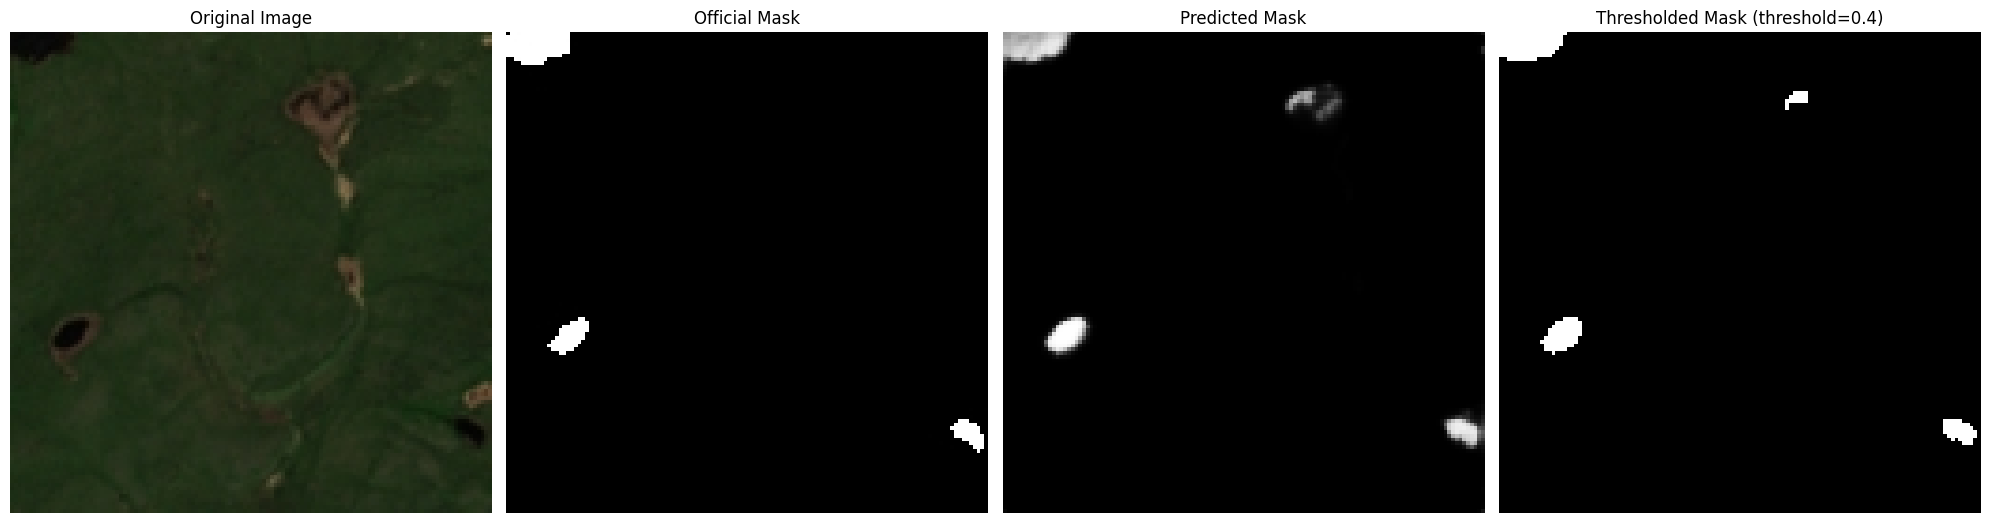

Processing 153_8704_128.jpg


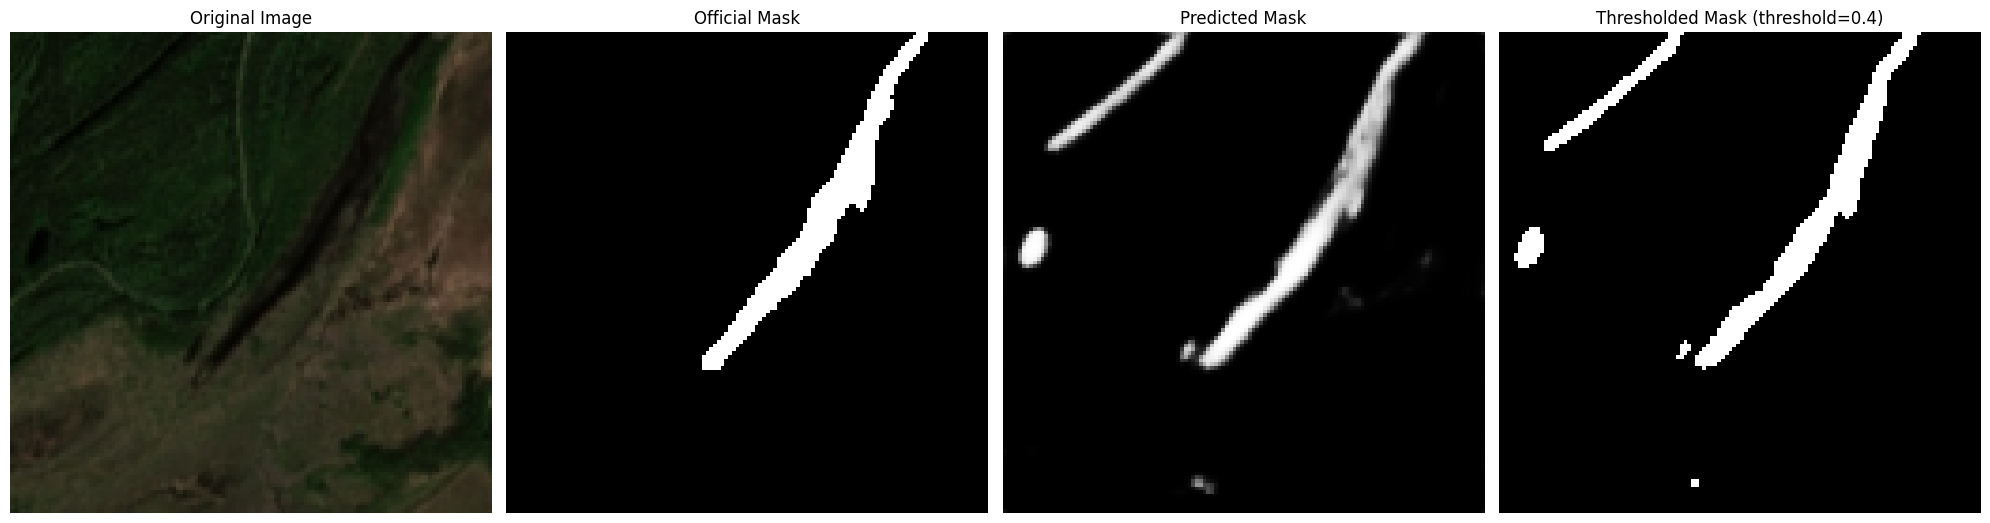

Processing 171_128_256.jpg


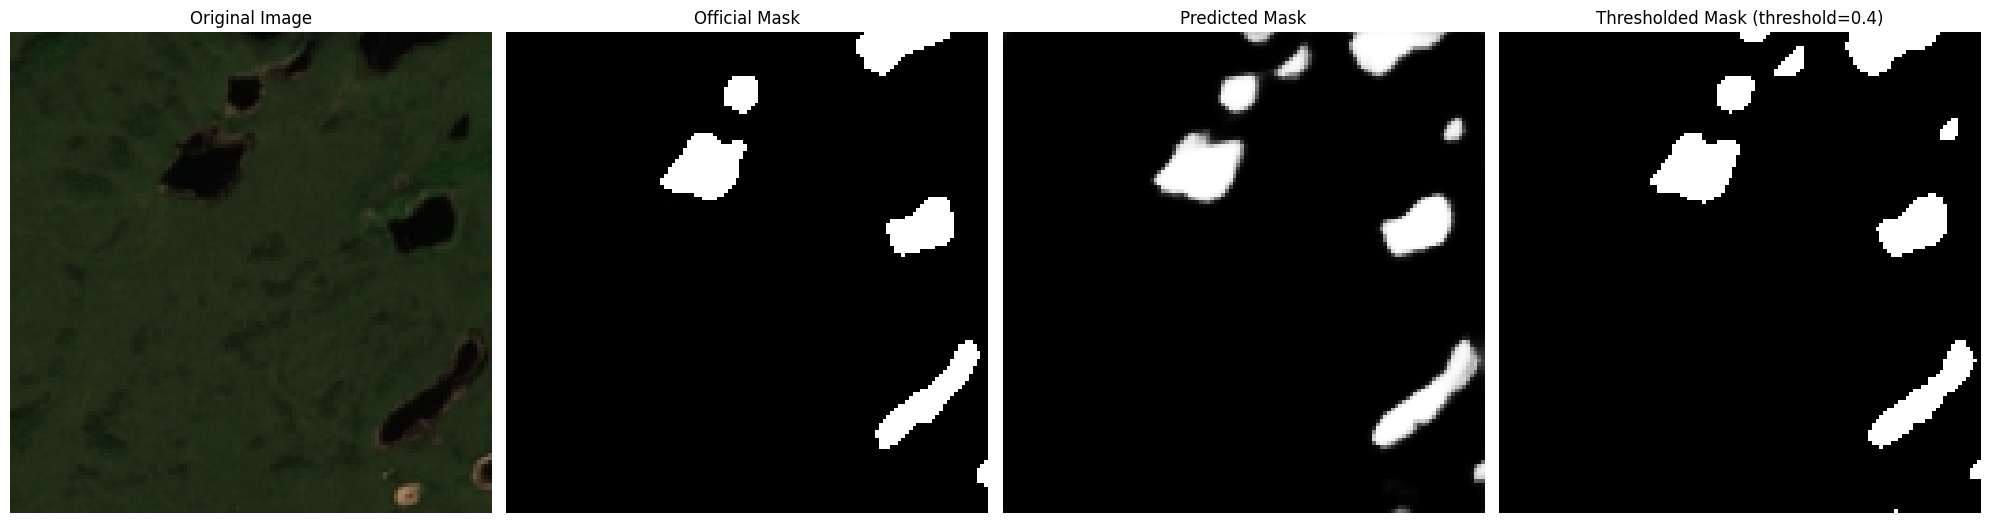

Processing 172_256_256.jpg


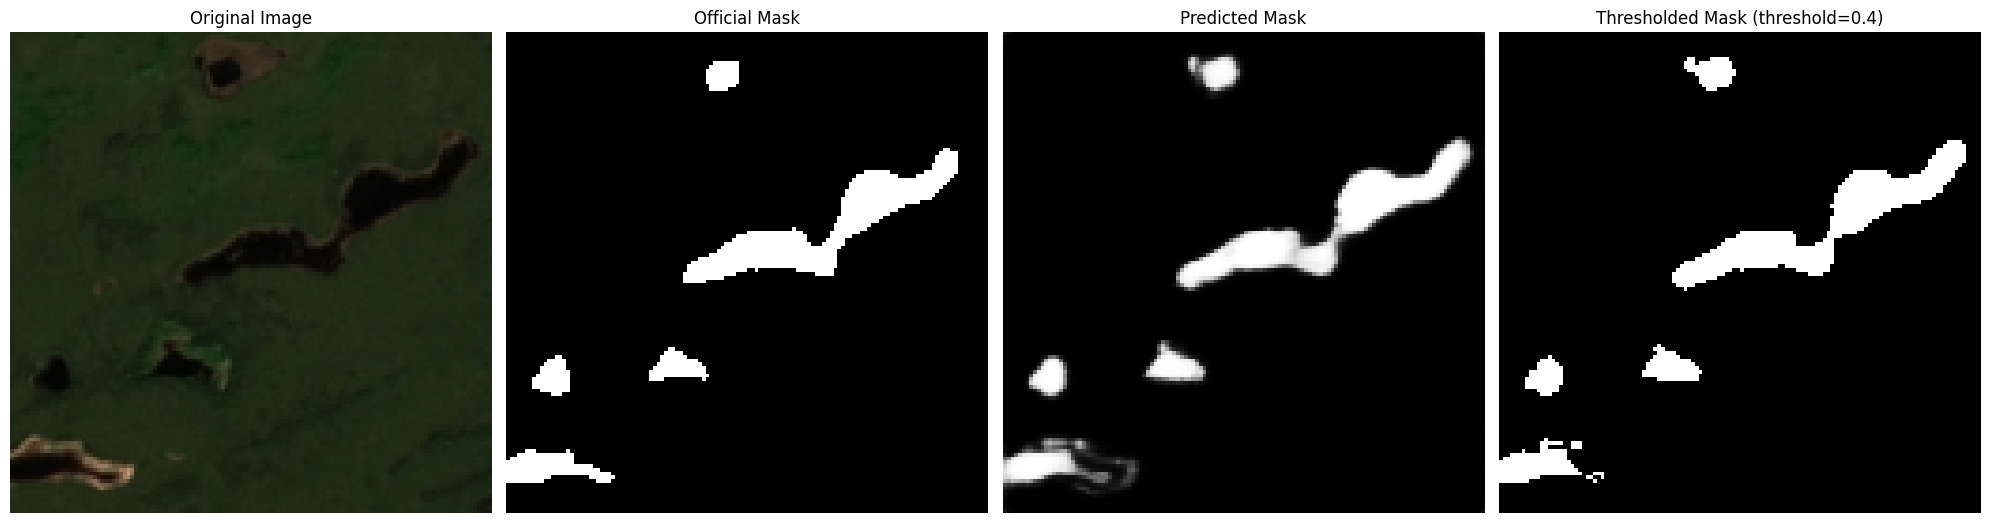

Processing 173_384_256.jpg


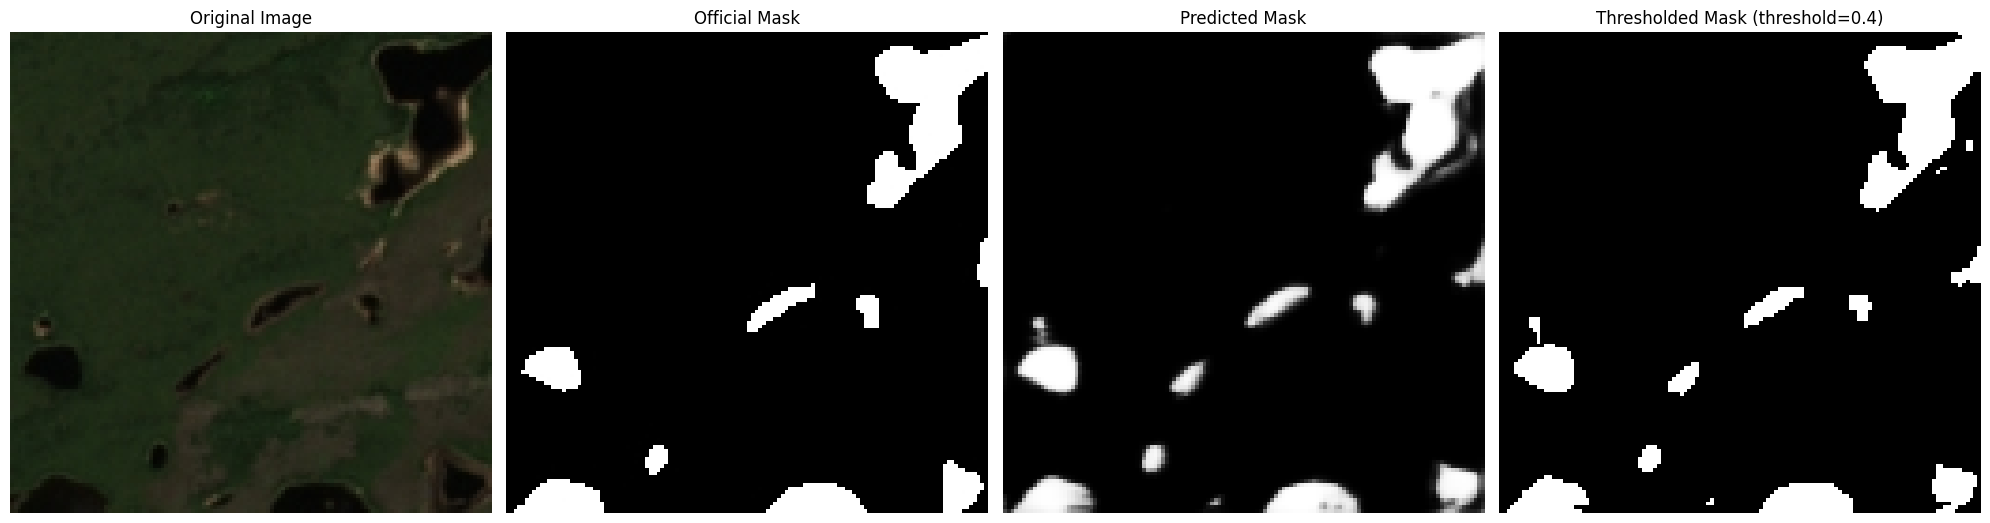

Processing 179_1152_256.jpg


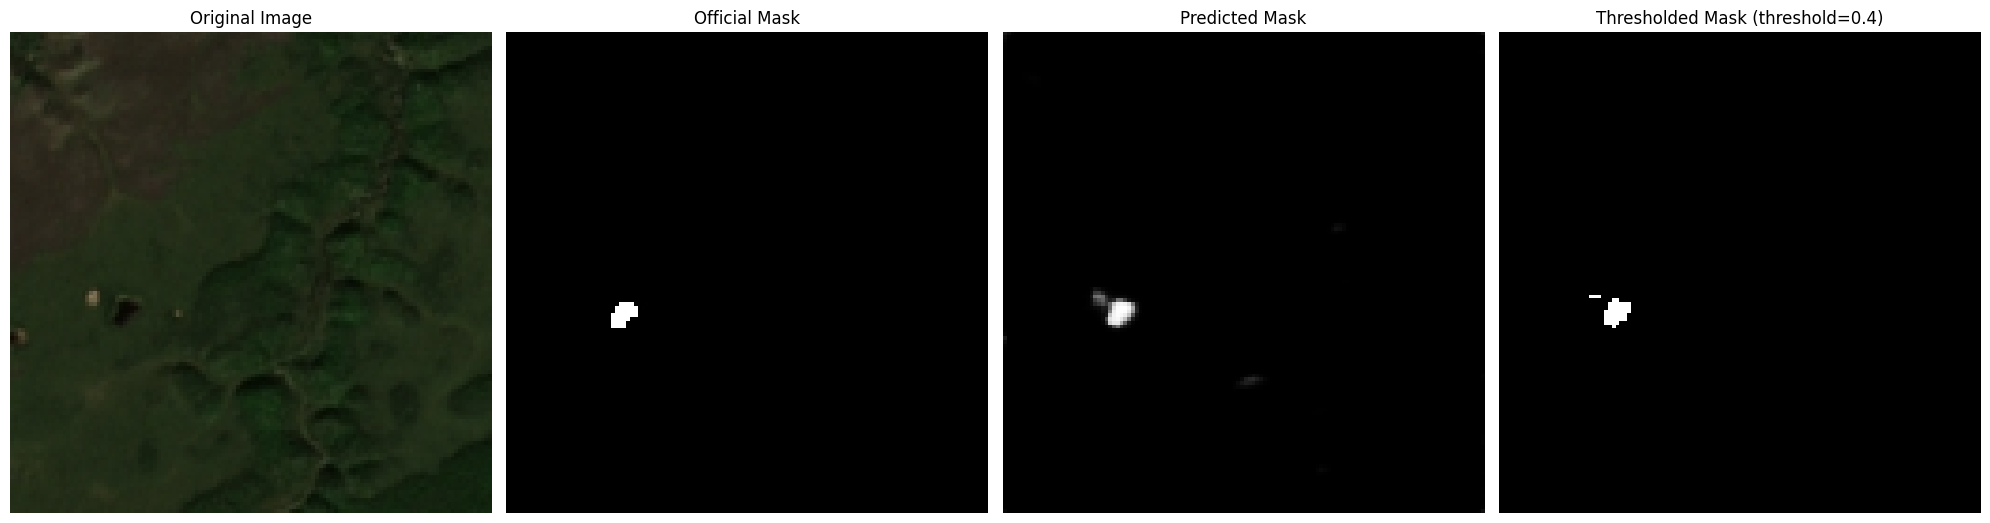

Processing 181_1408_256.jpg


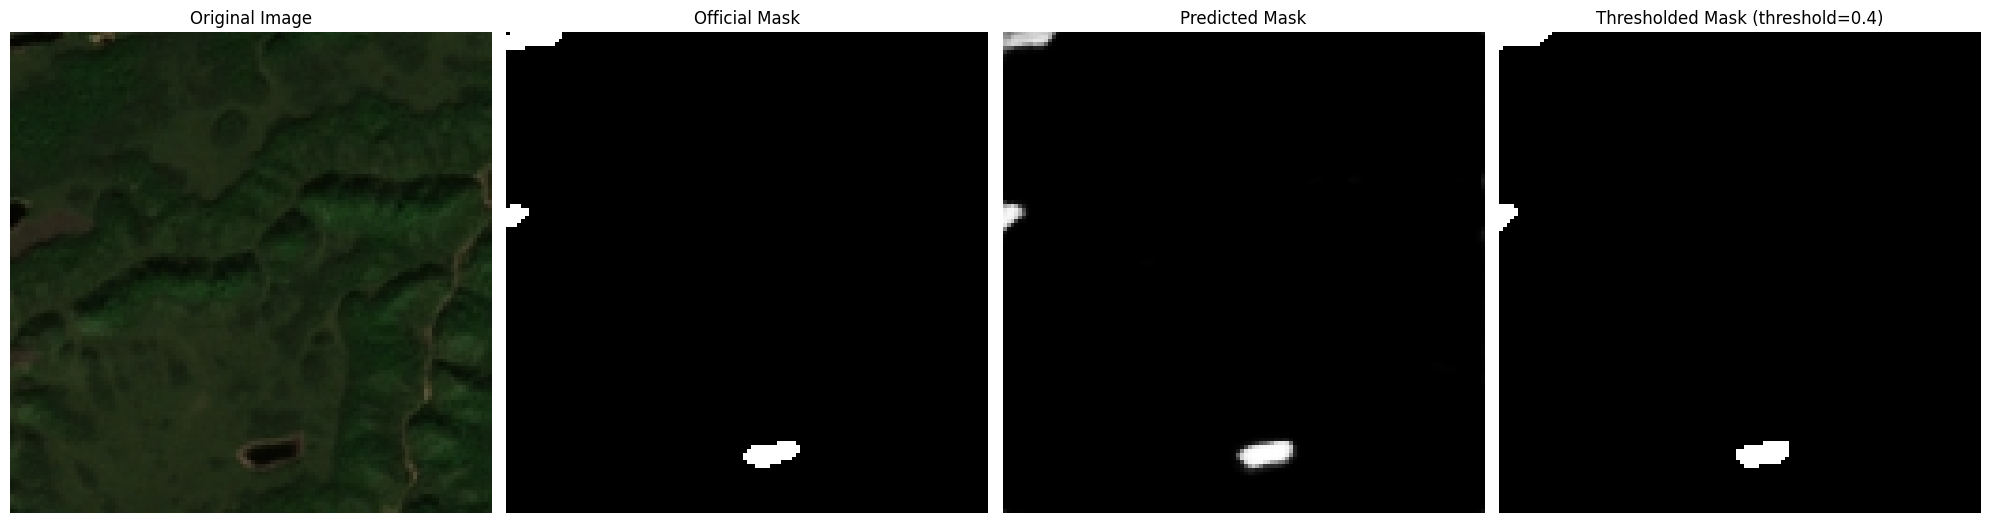

Processing 184_1792_256.jpg


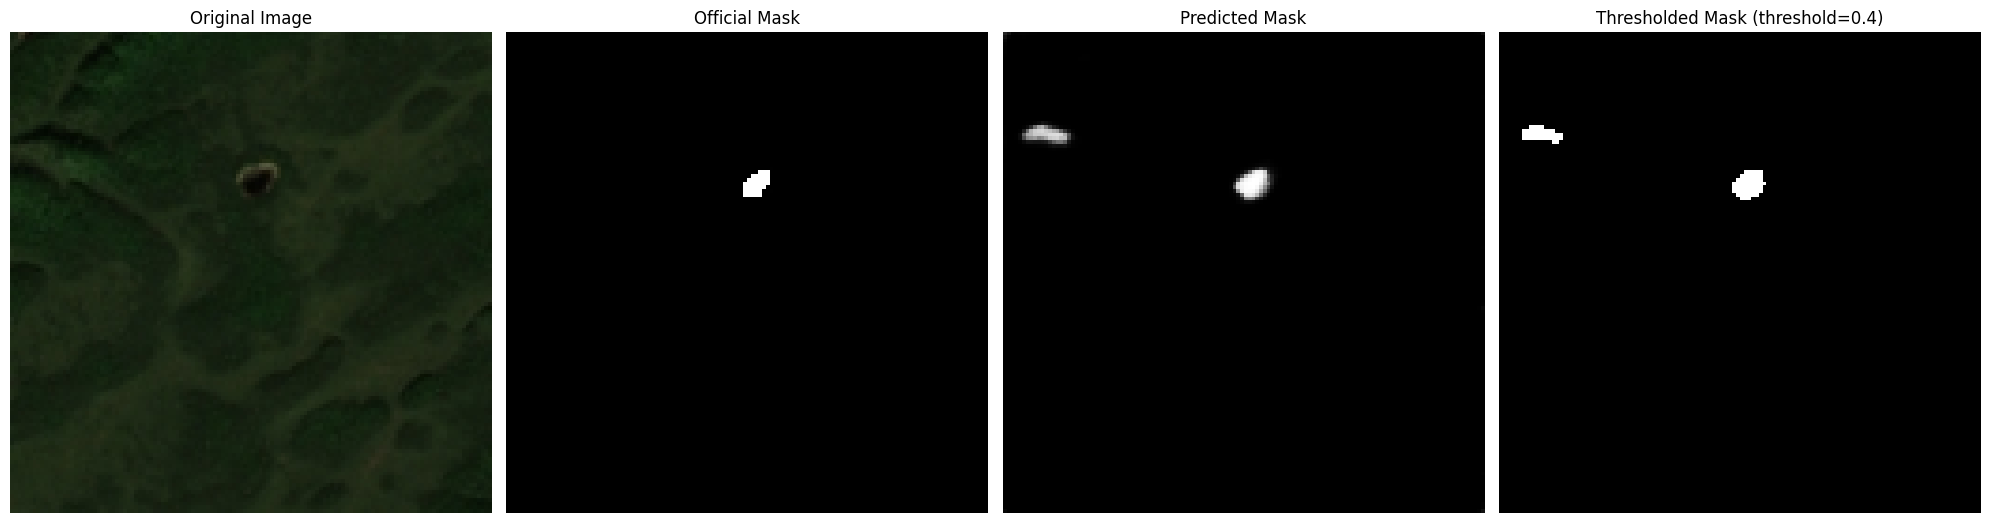

Processing 187_2176_256.jpg


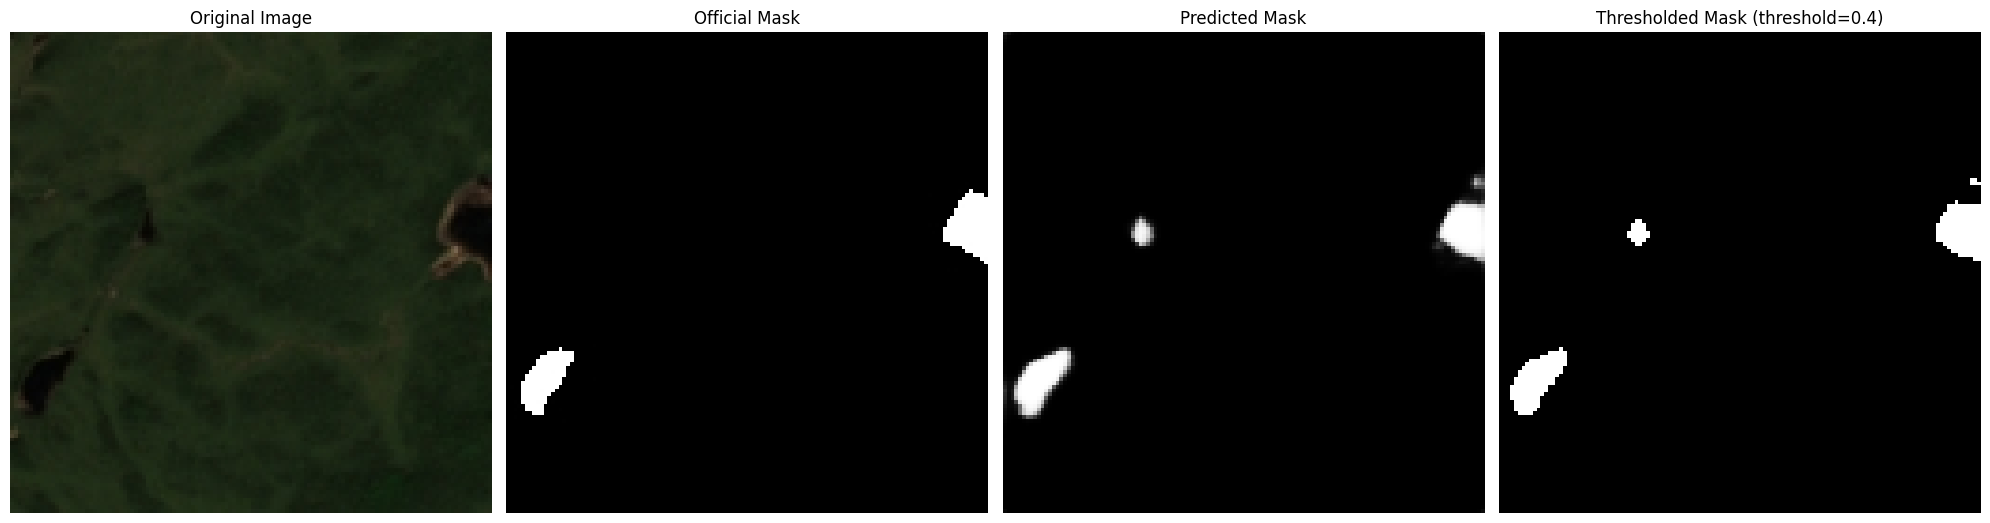

Processing 188_2304_256.jpg


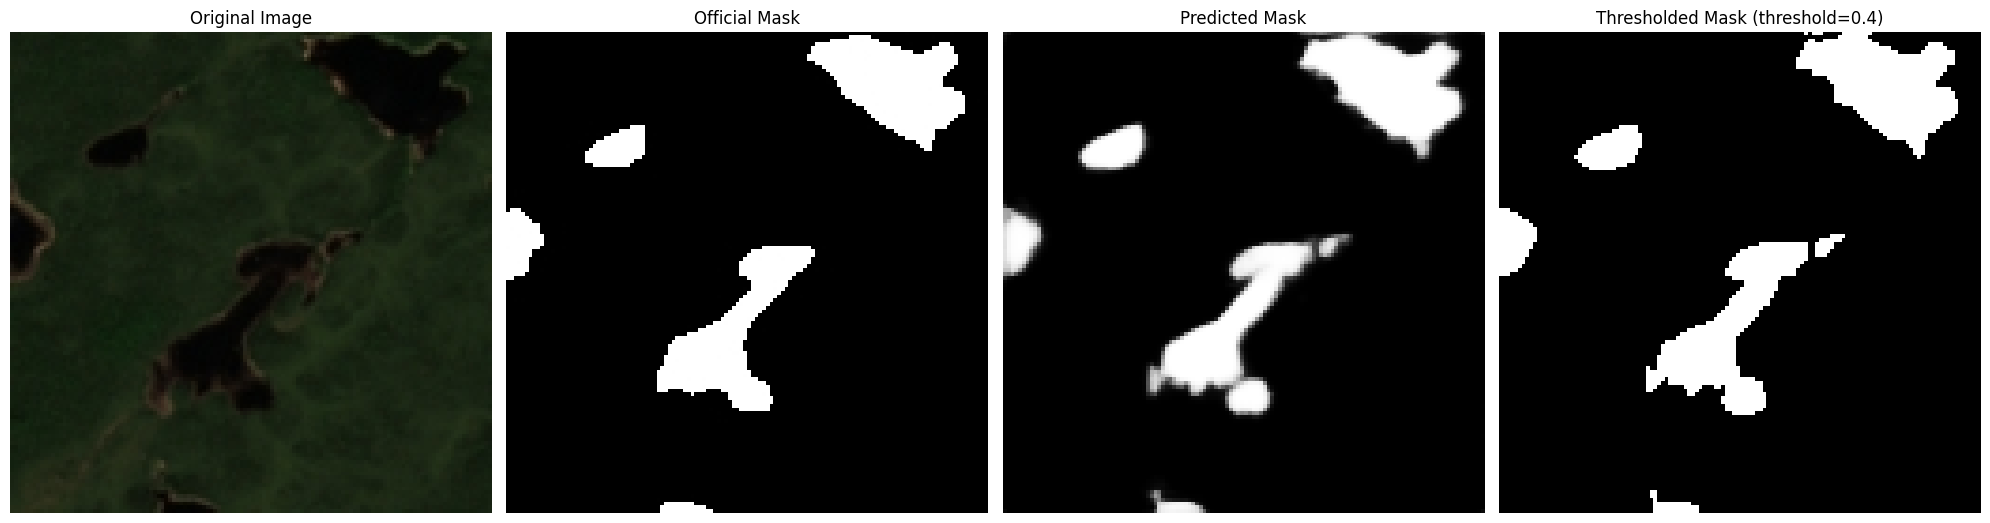

Processing 194_3072_256.jpg


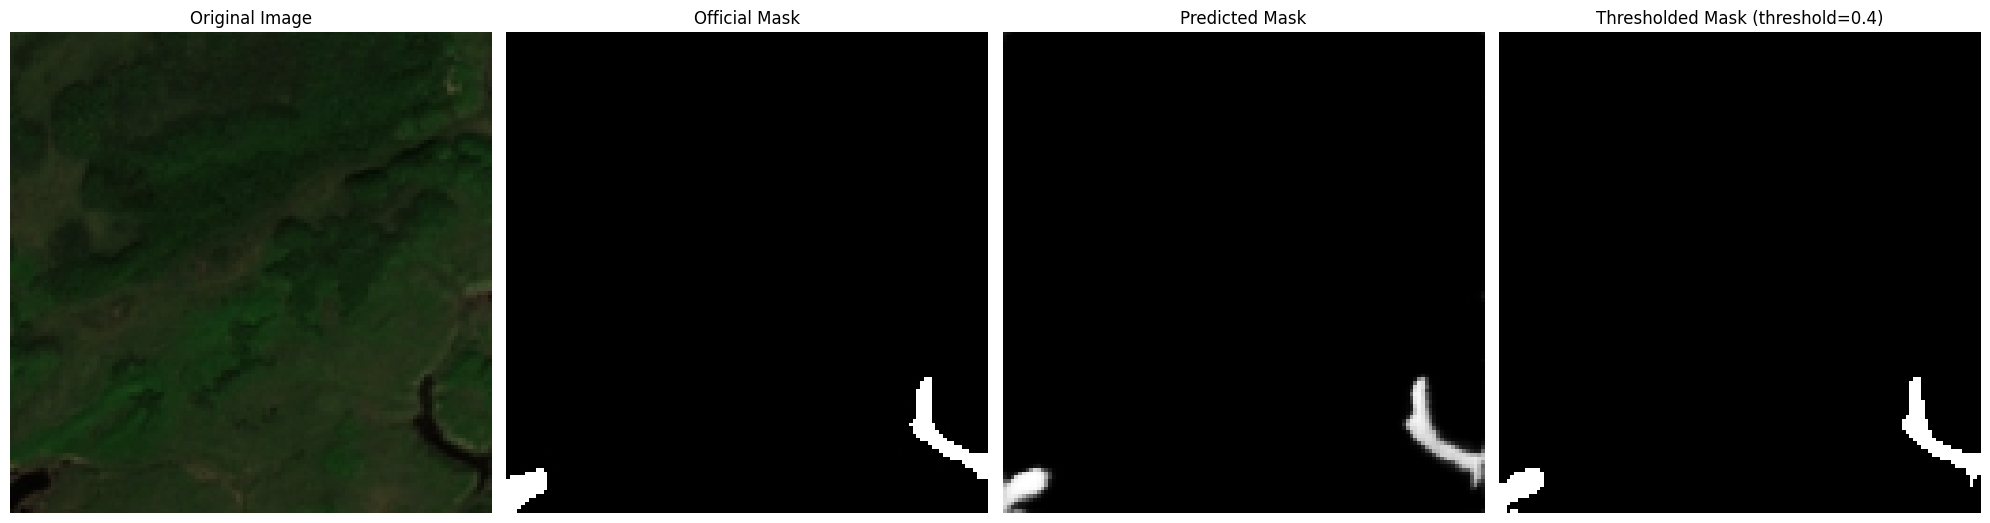

Processing 200_3840_256.jpg


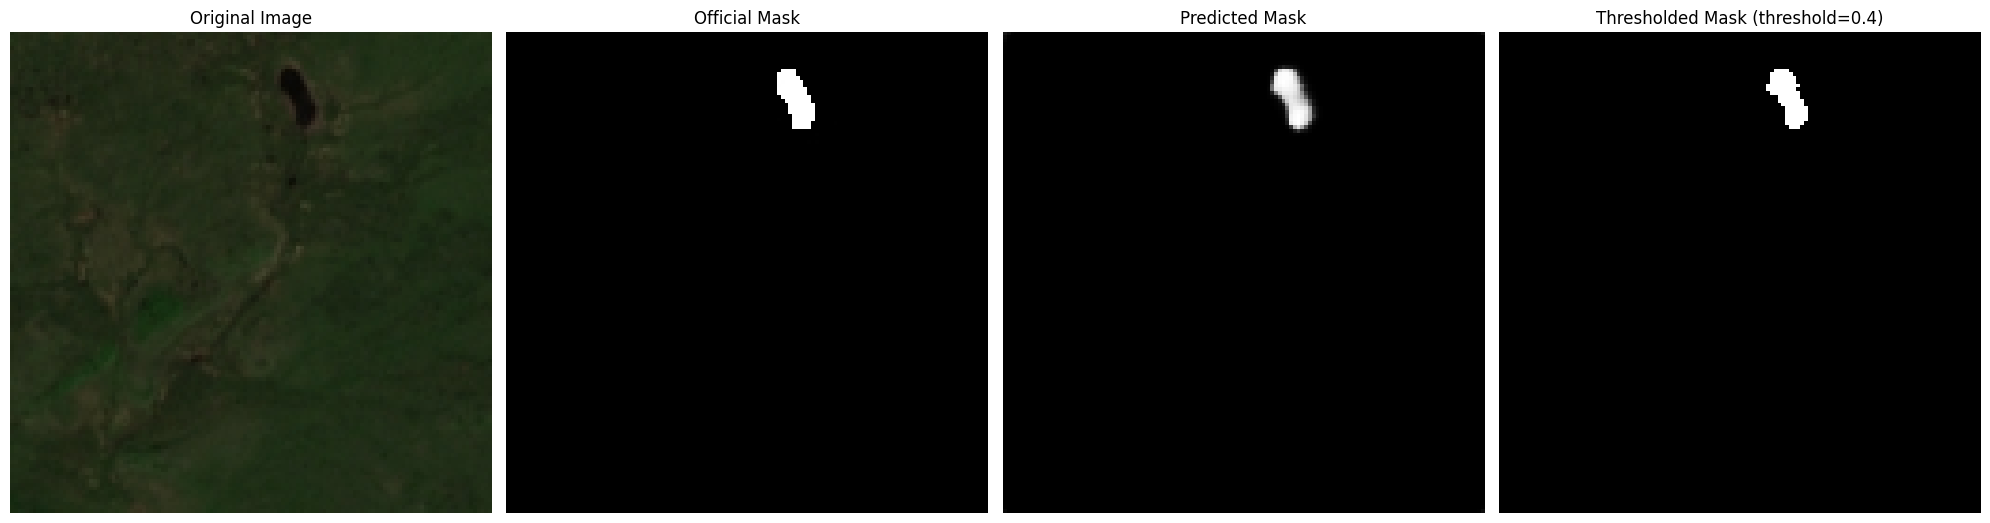

Processing 205_4480_256.jpg


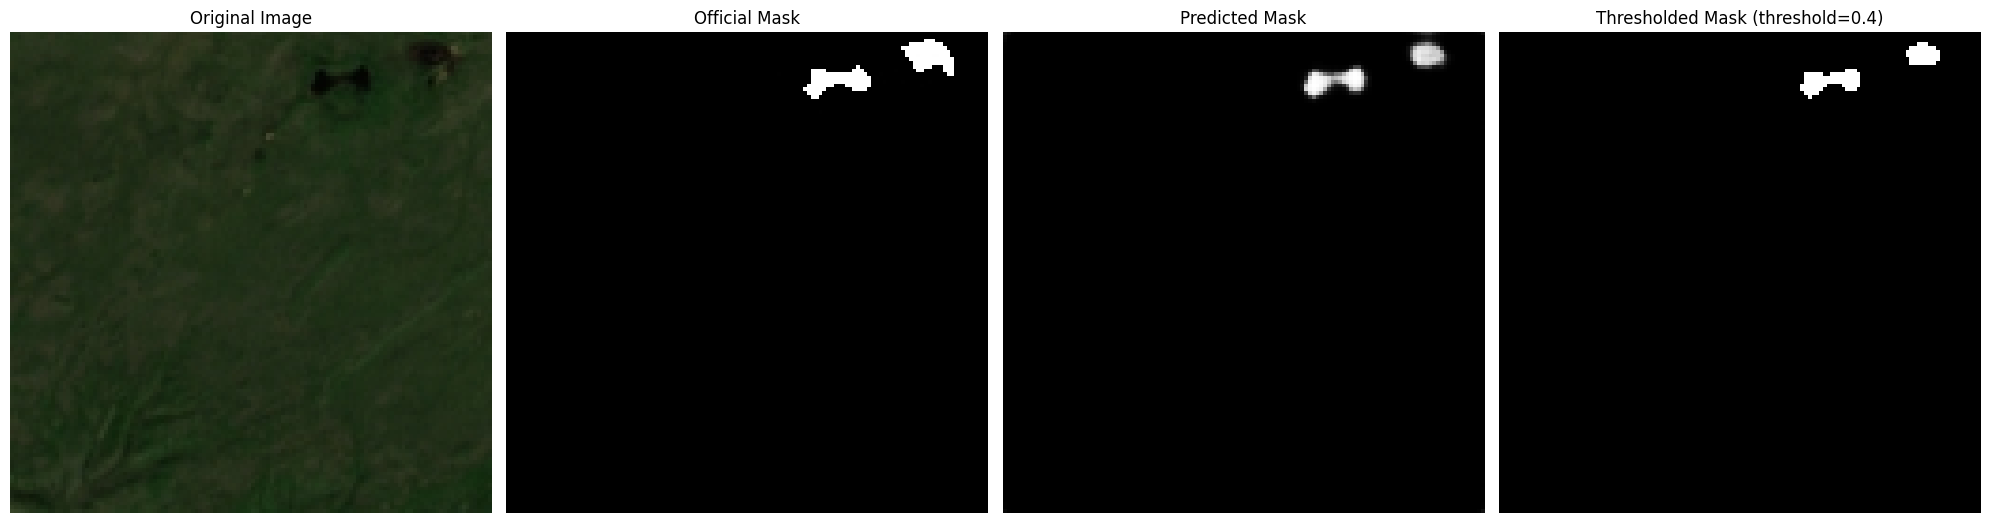

Processing 245_9600_256.jpg


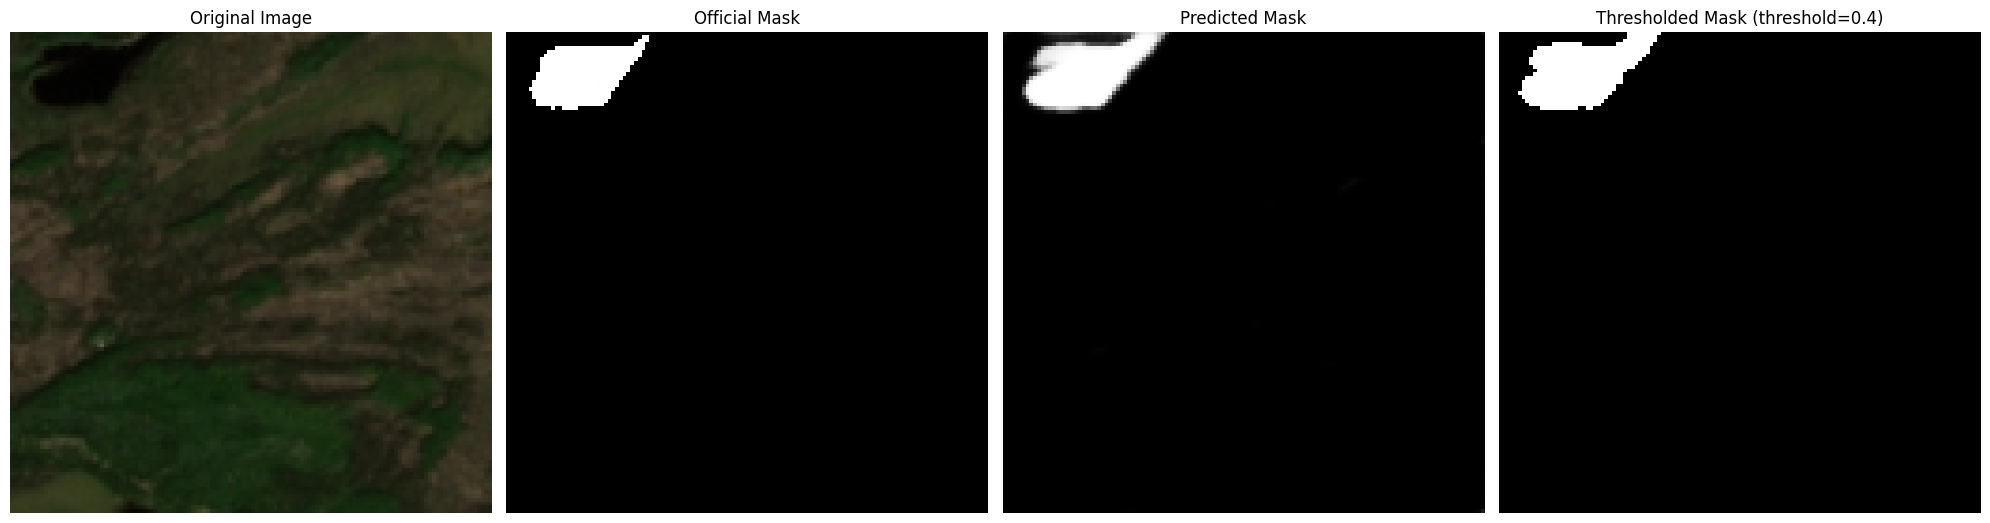

Processing 247_9856_256.jpg


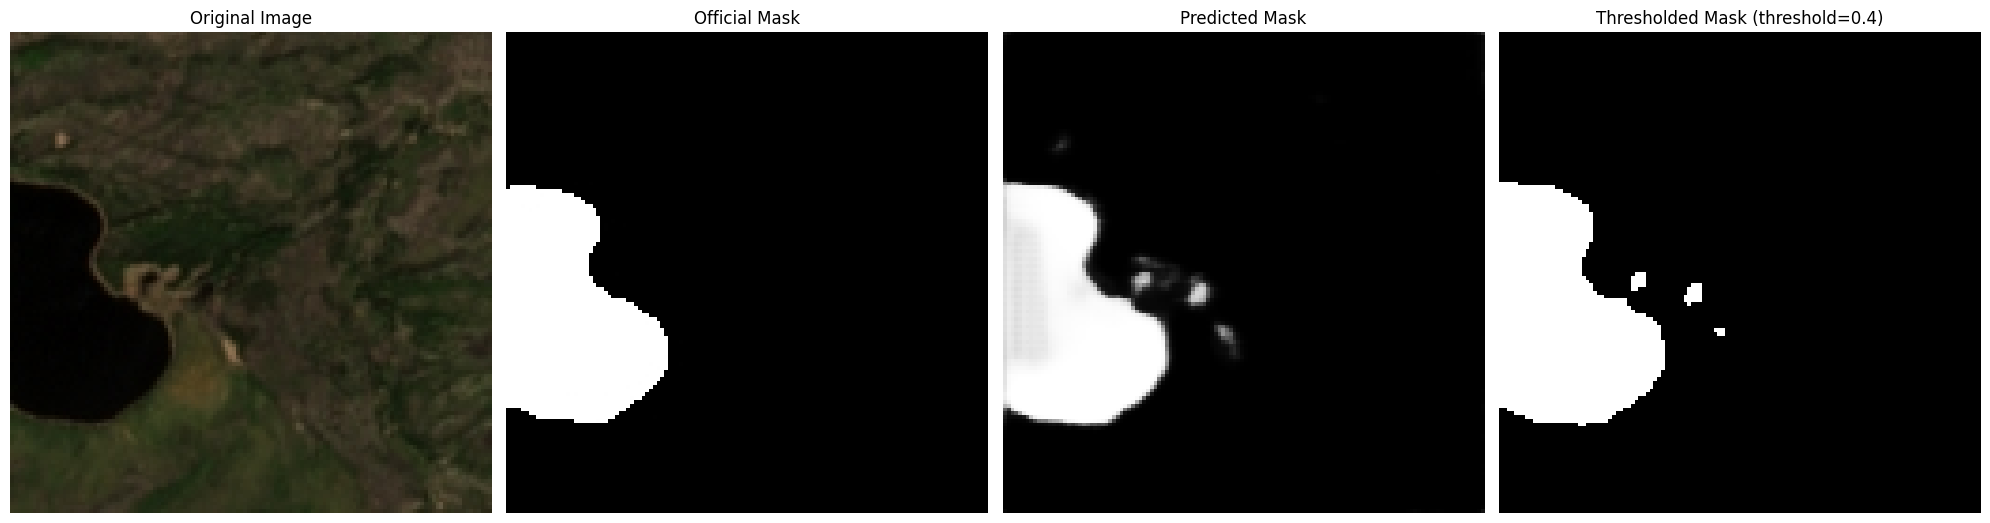

Processing 252_10496_256.jpg


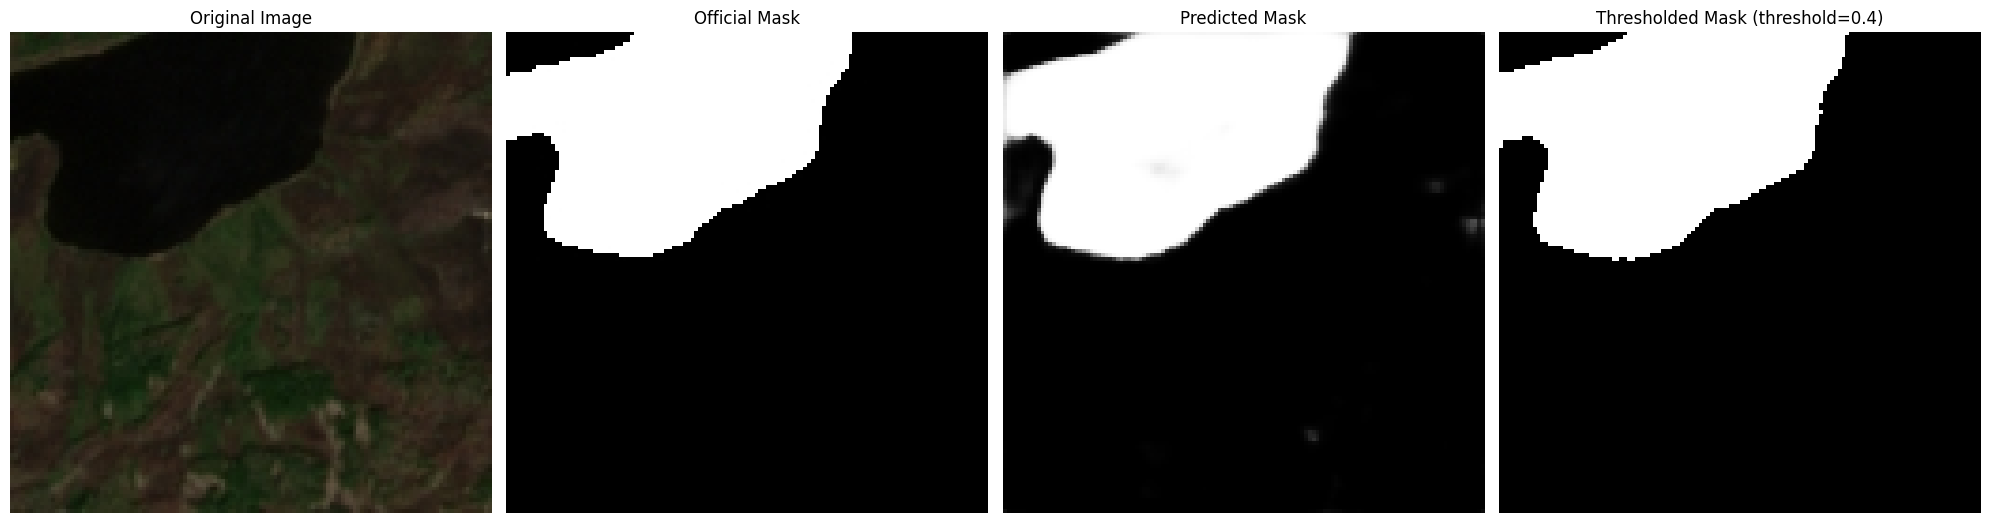

Processing 255_0_384.jpg


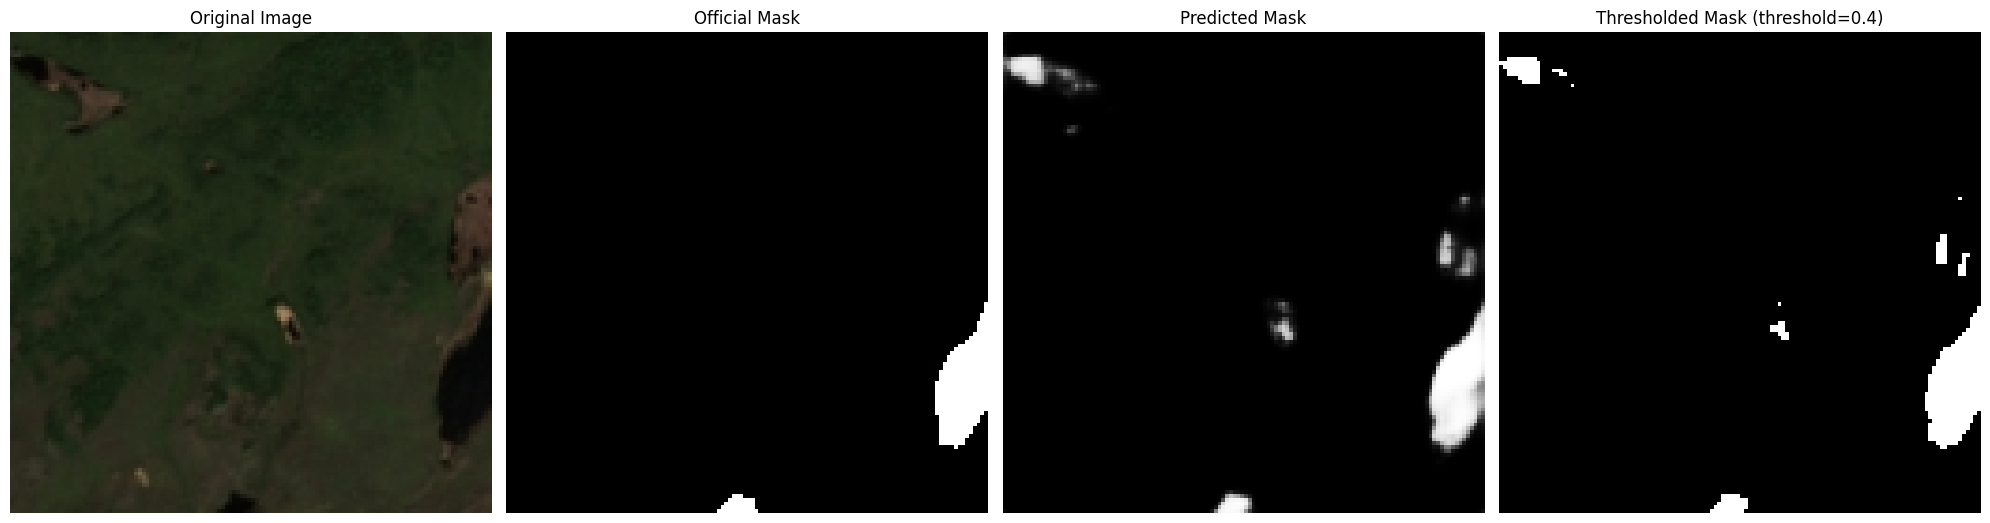

Processing 272_2176_384.jpg


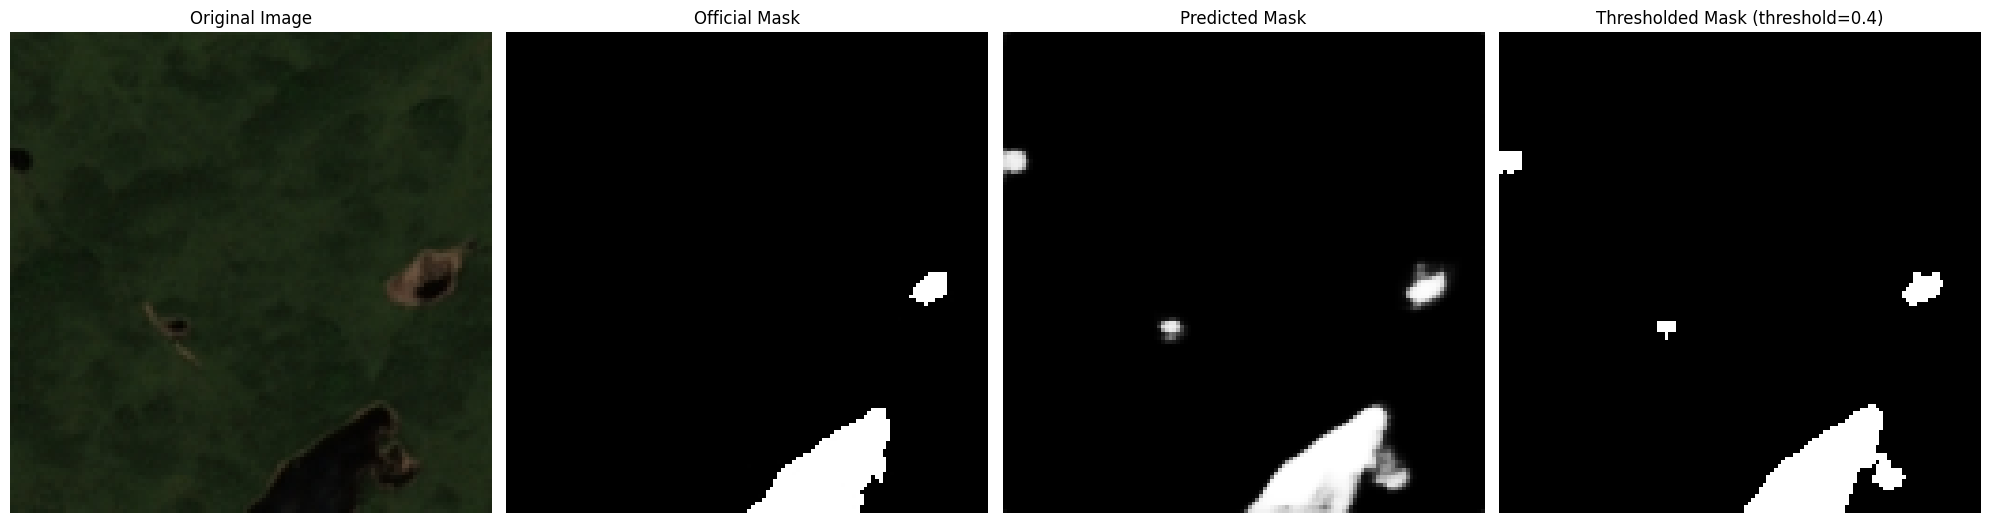

Processing 283_3584_384.jpg


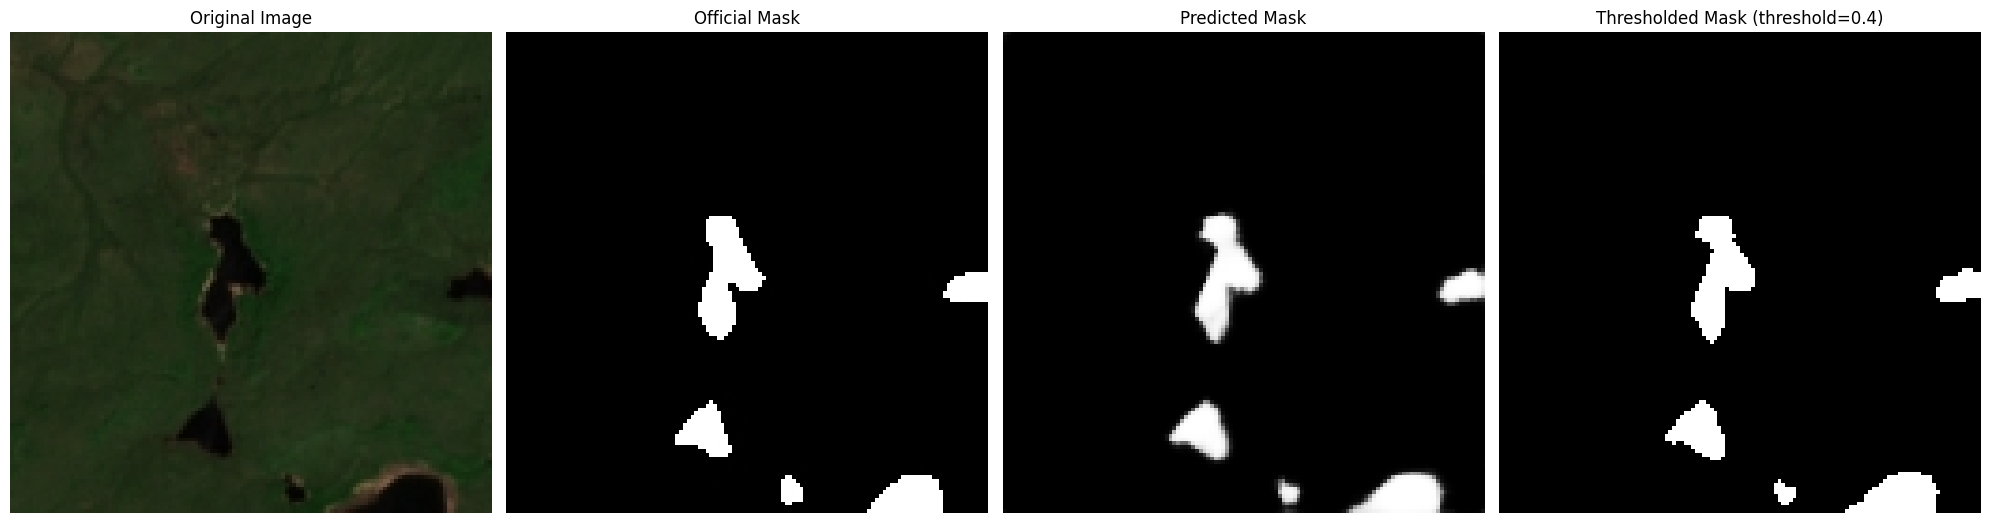

Processing 284_3712_384.jpg


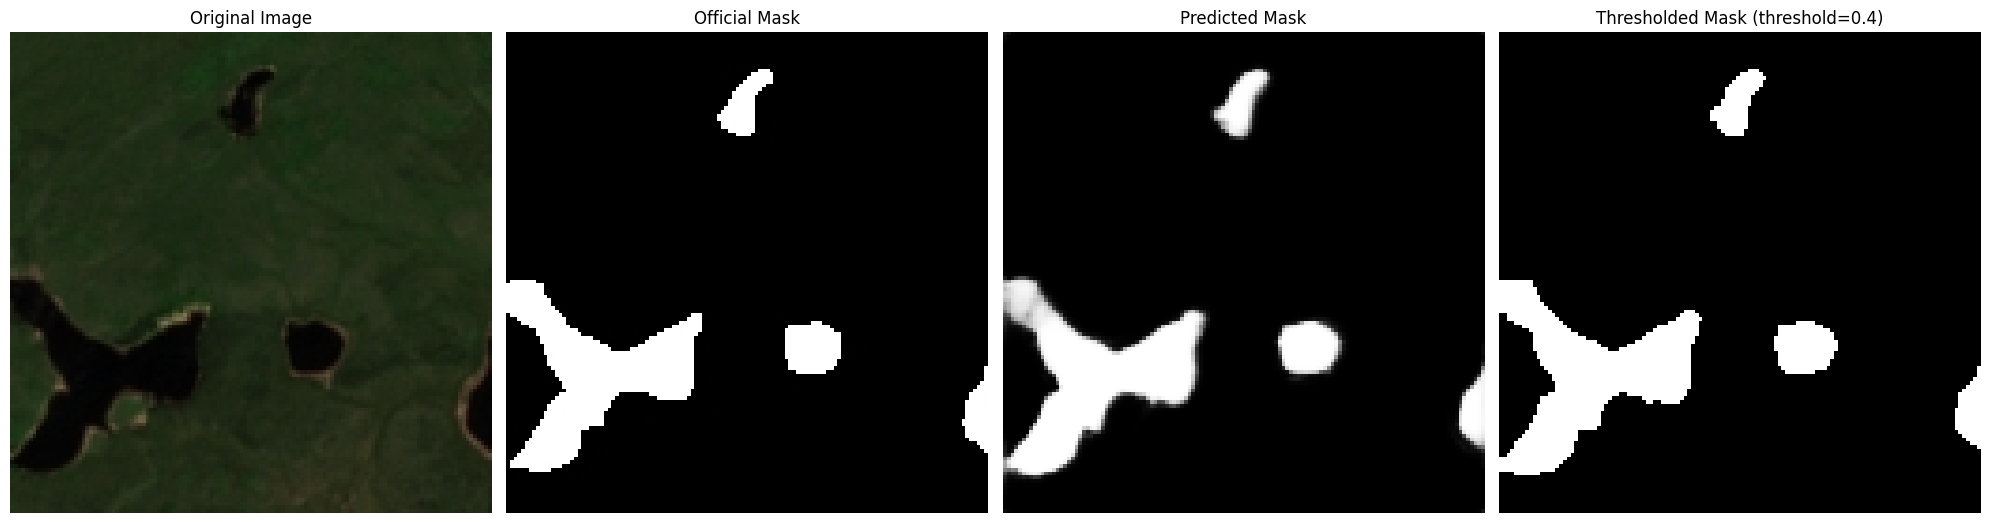

Processing 285_3840_384.jpg


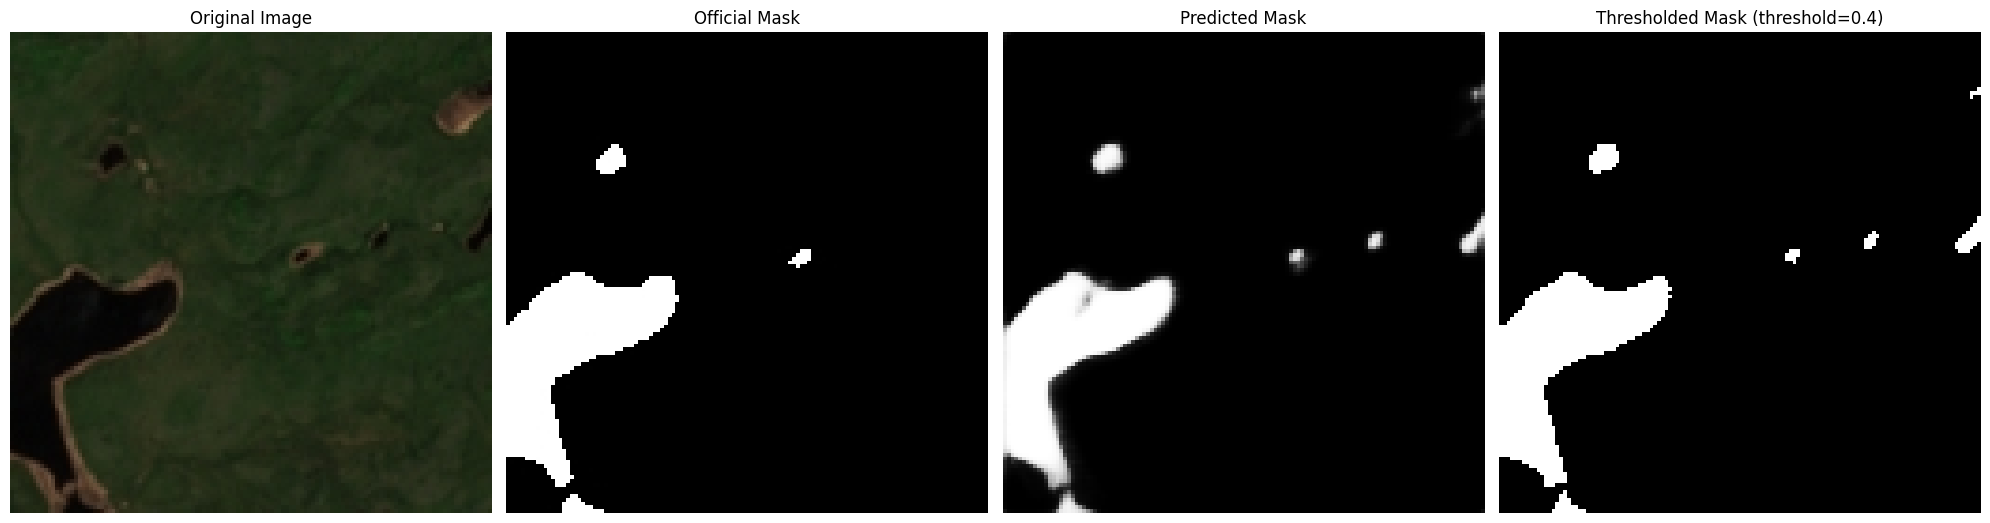

Processing 28_3584_0.jpg


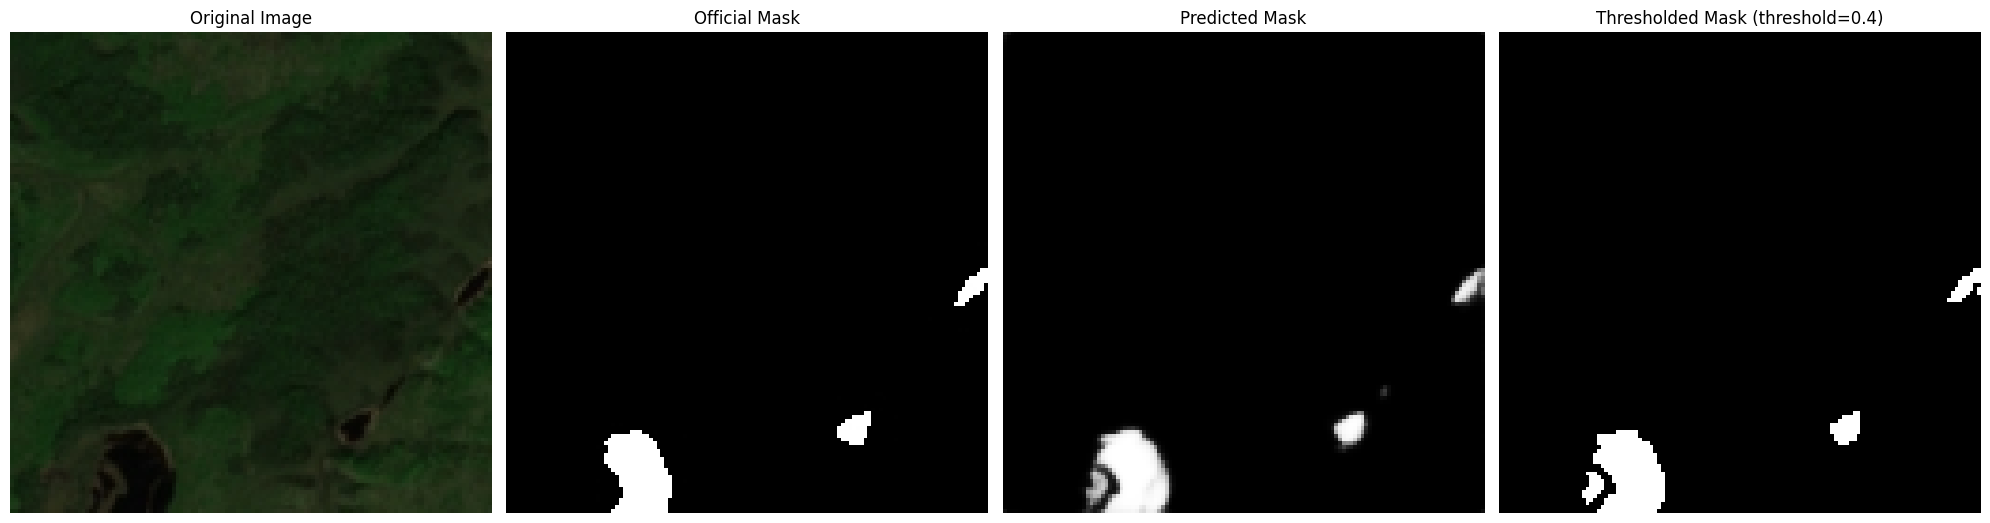

Processing 2_256_0.jpg


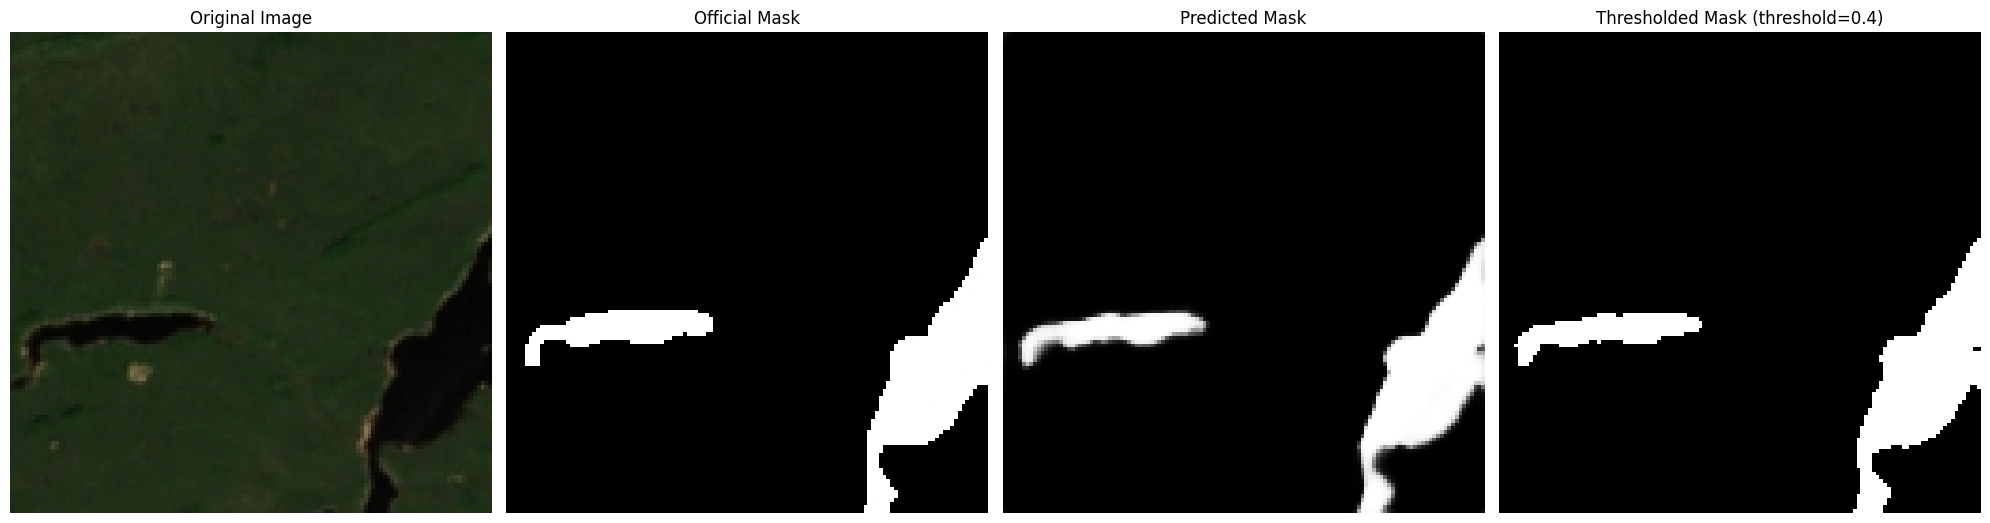

Processing 336_10368_384.jpg


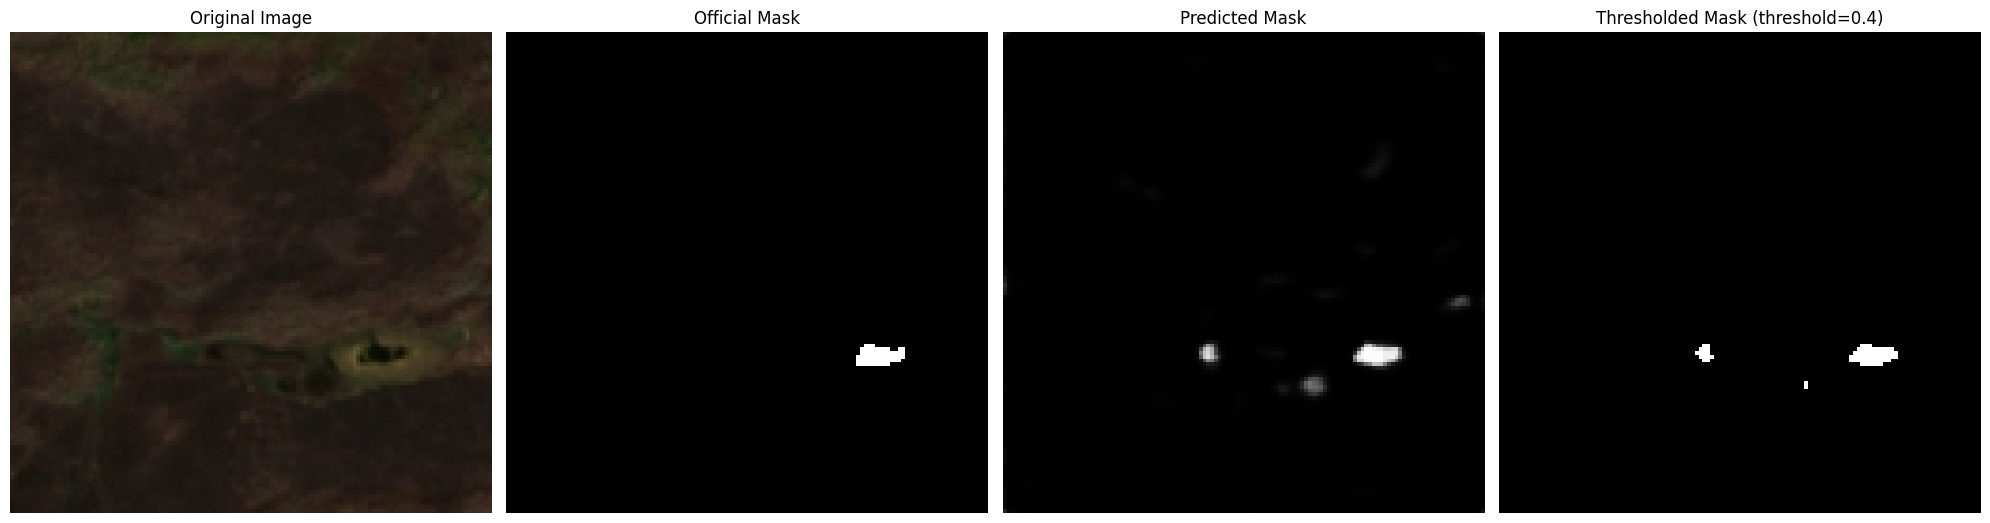

Processing 343_384_512.jpg


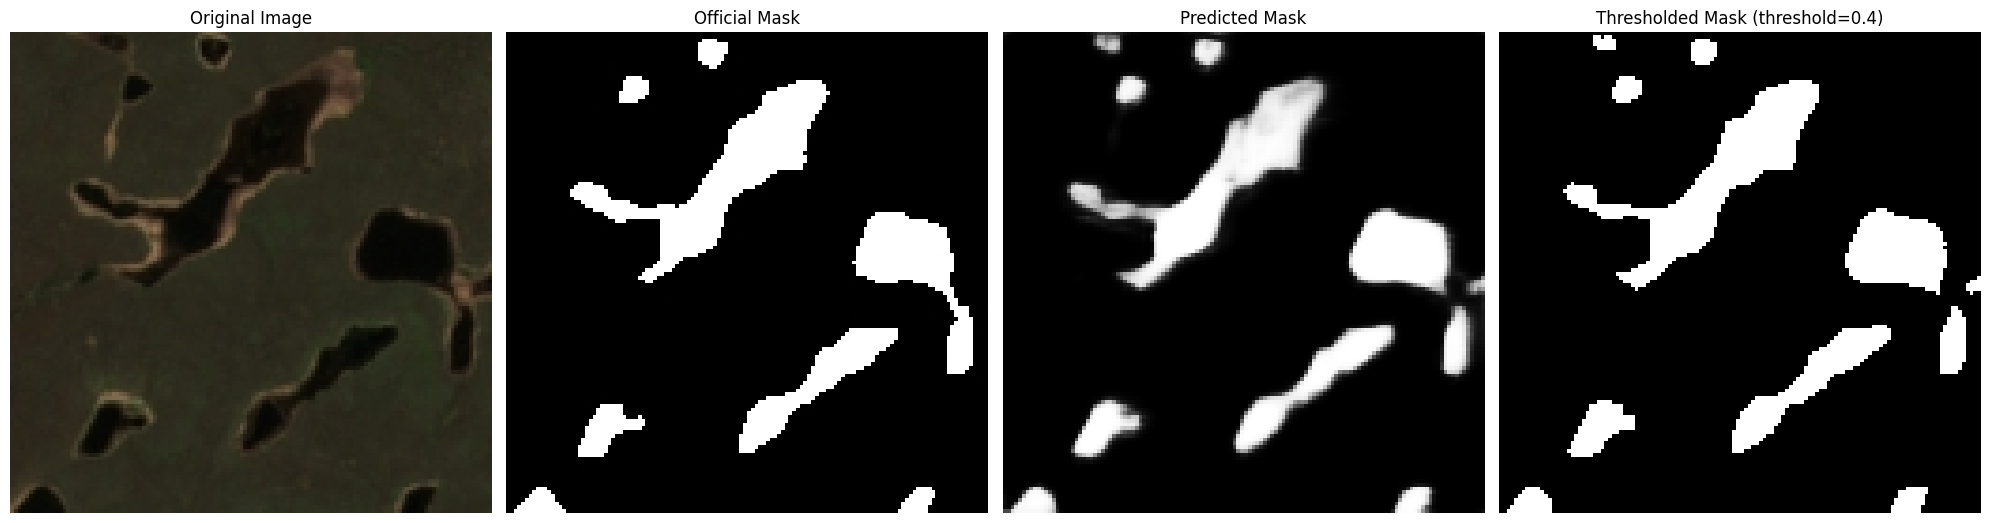

Processing 344_512_512.jpg


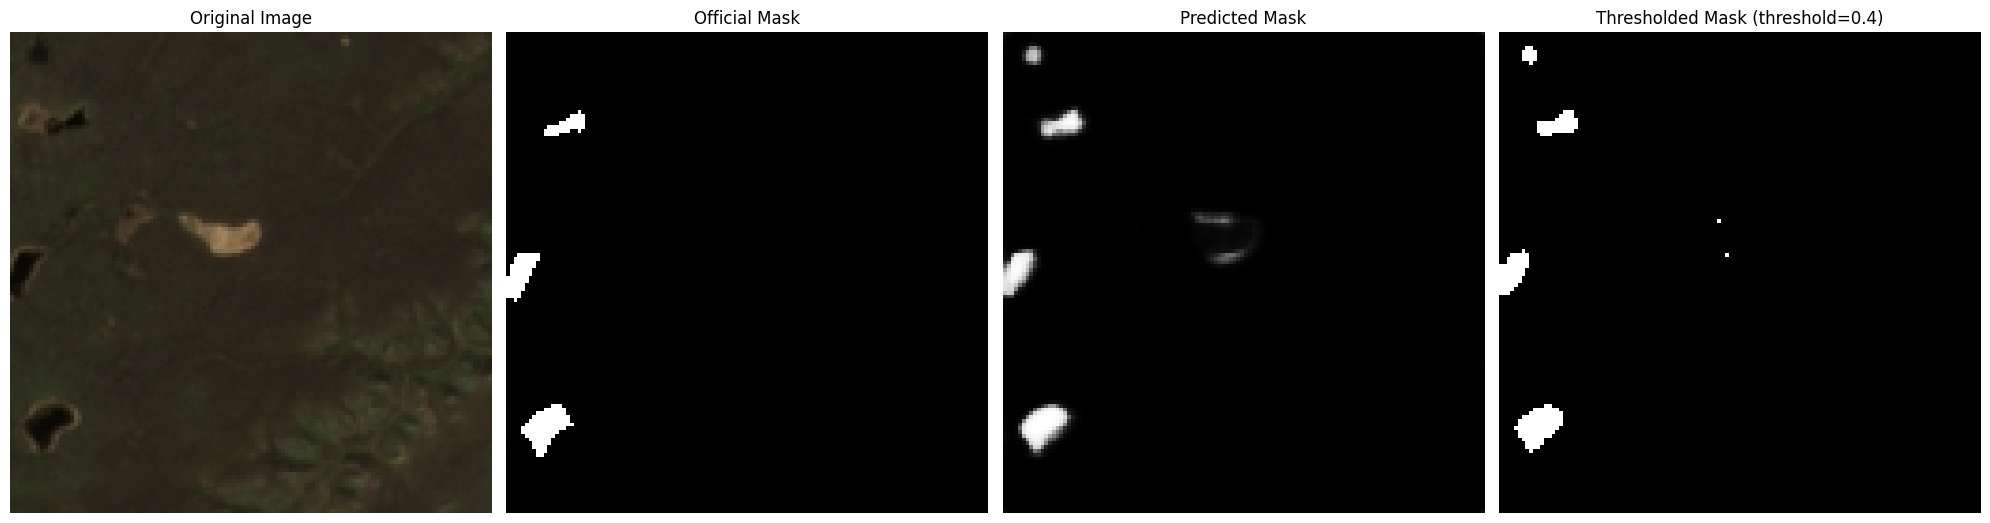

Processing 347_896_512.jpg


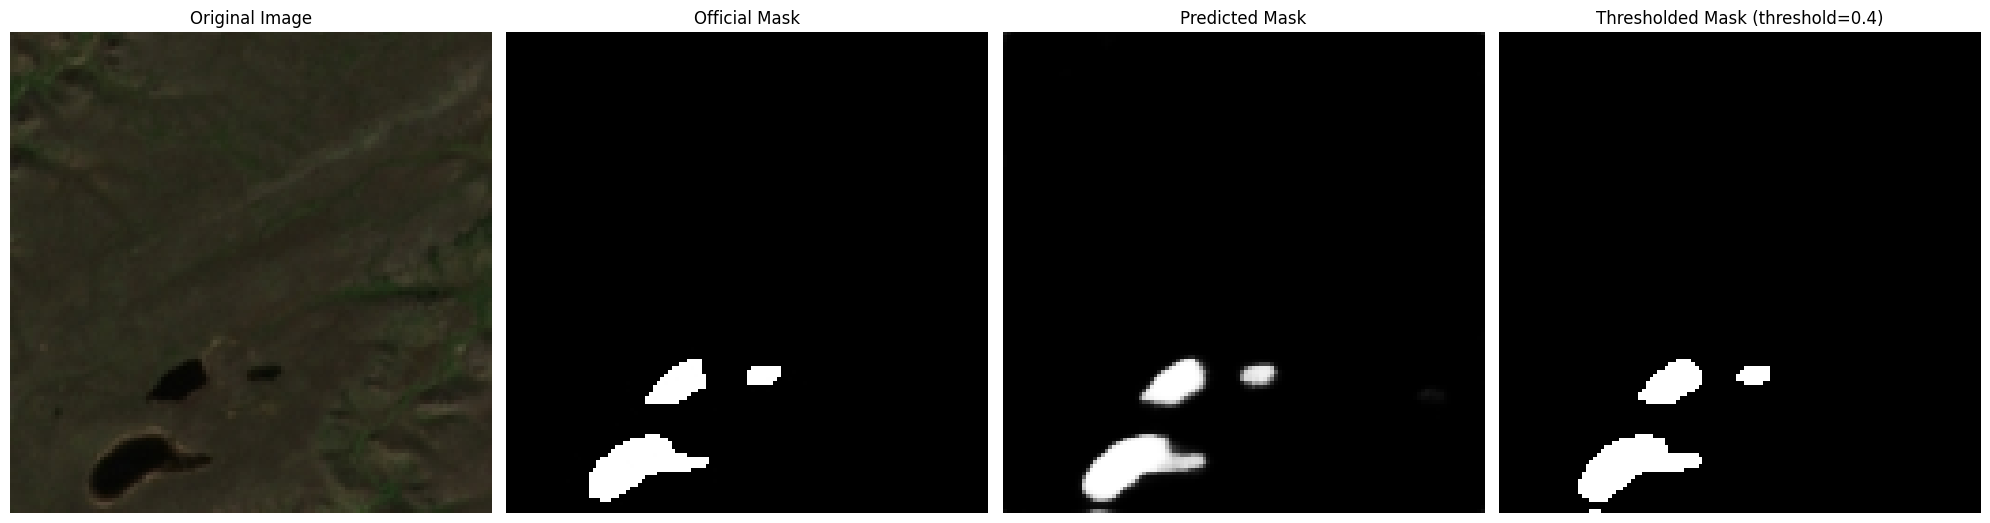

Processing 351_1408_512.jpg


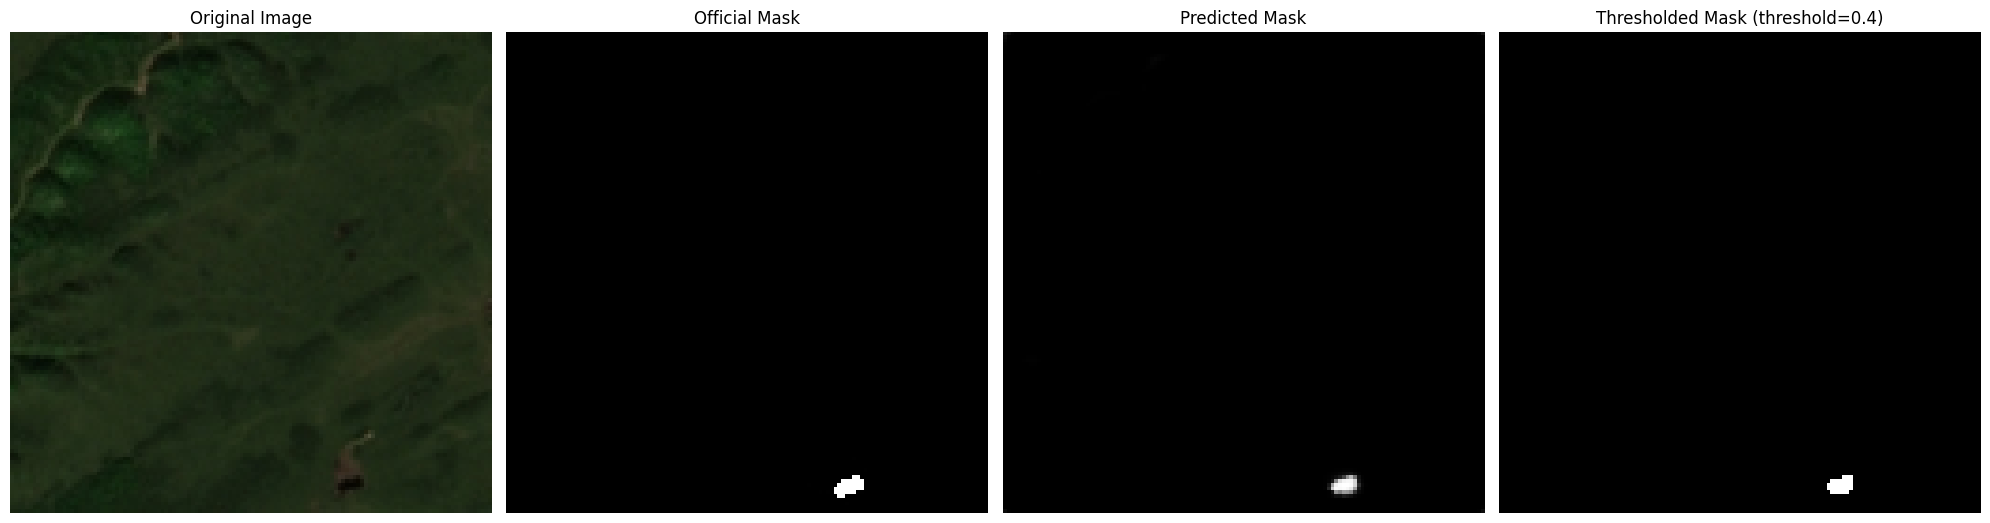

Processing 35_4480_0.jpg


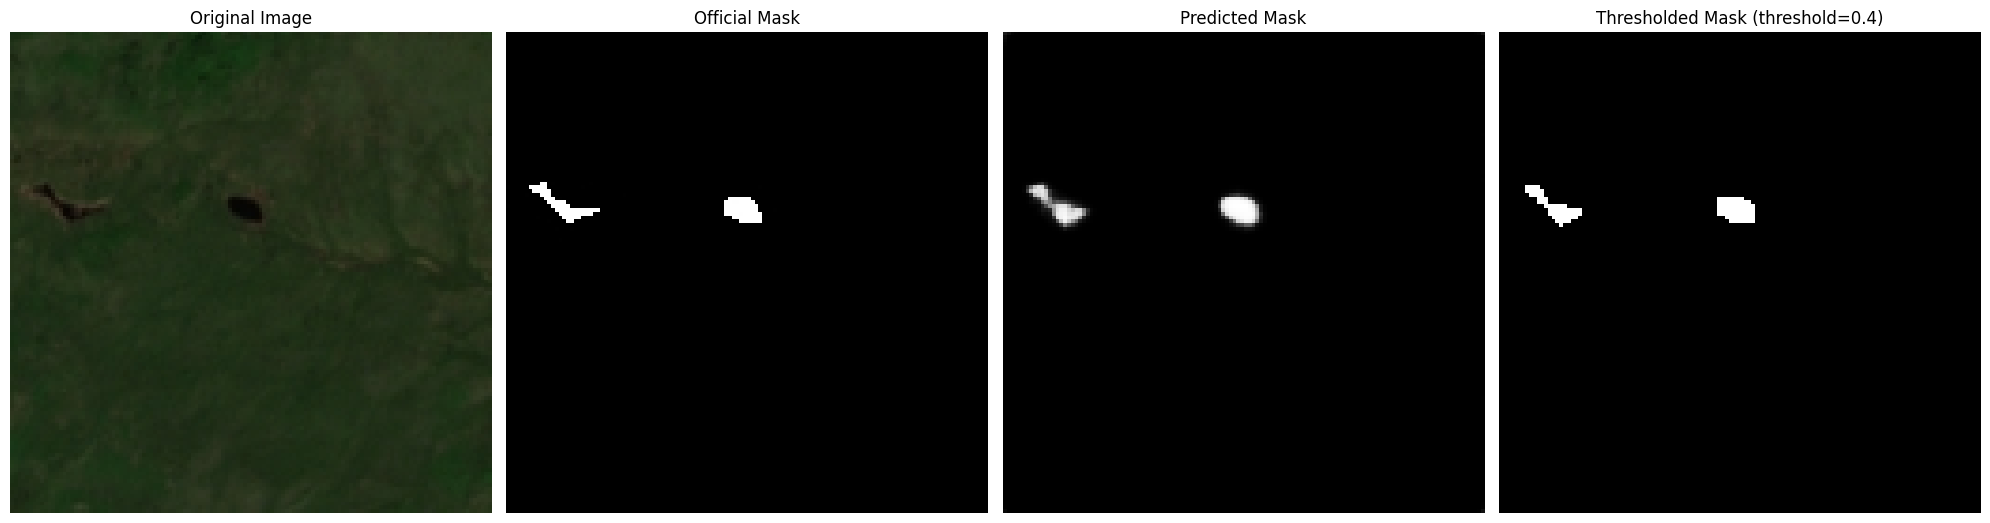

Processing 363_2944_512.jpg


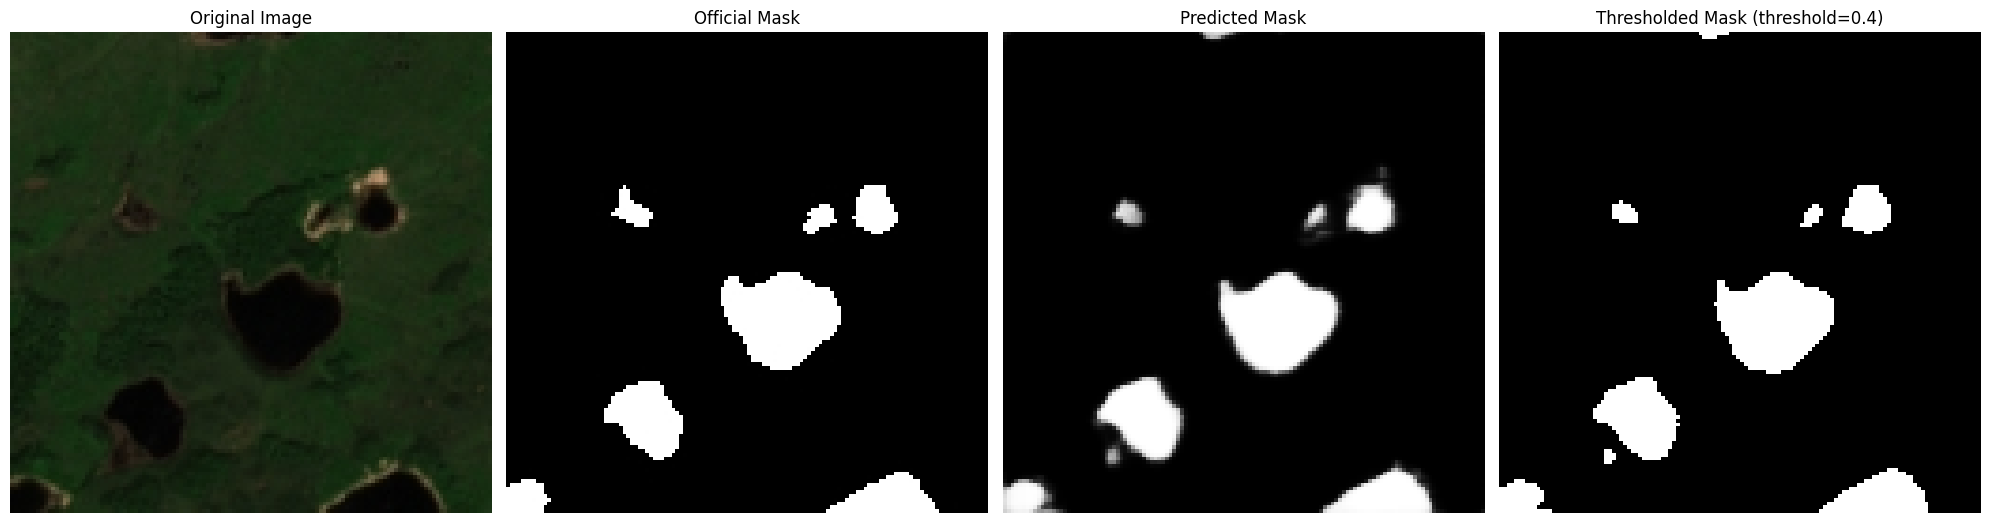

Processing 364_3072_512.jpg


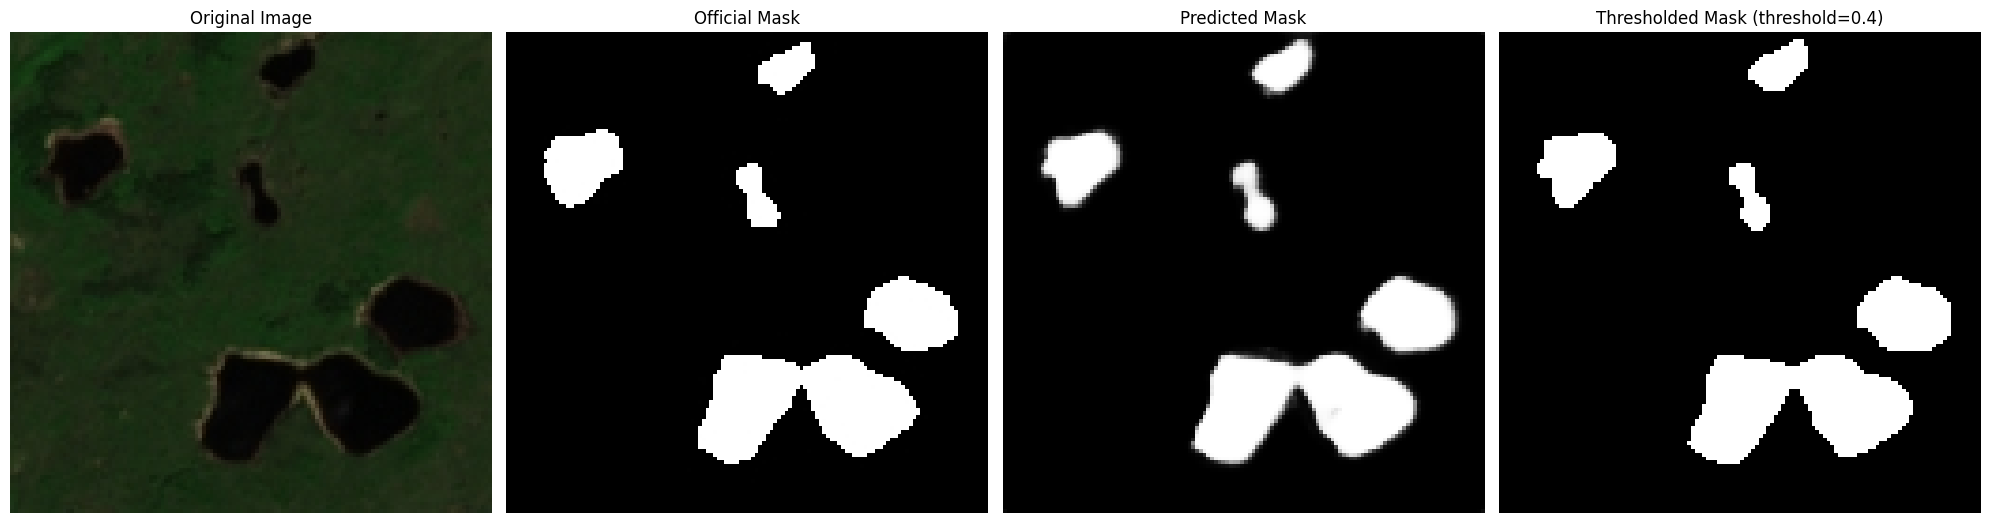

Processing 374_4352_512.jpg


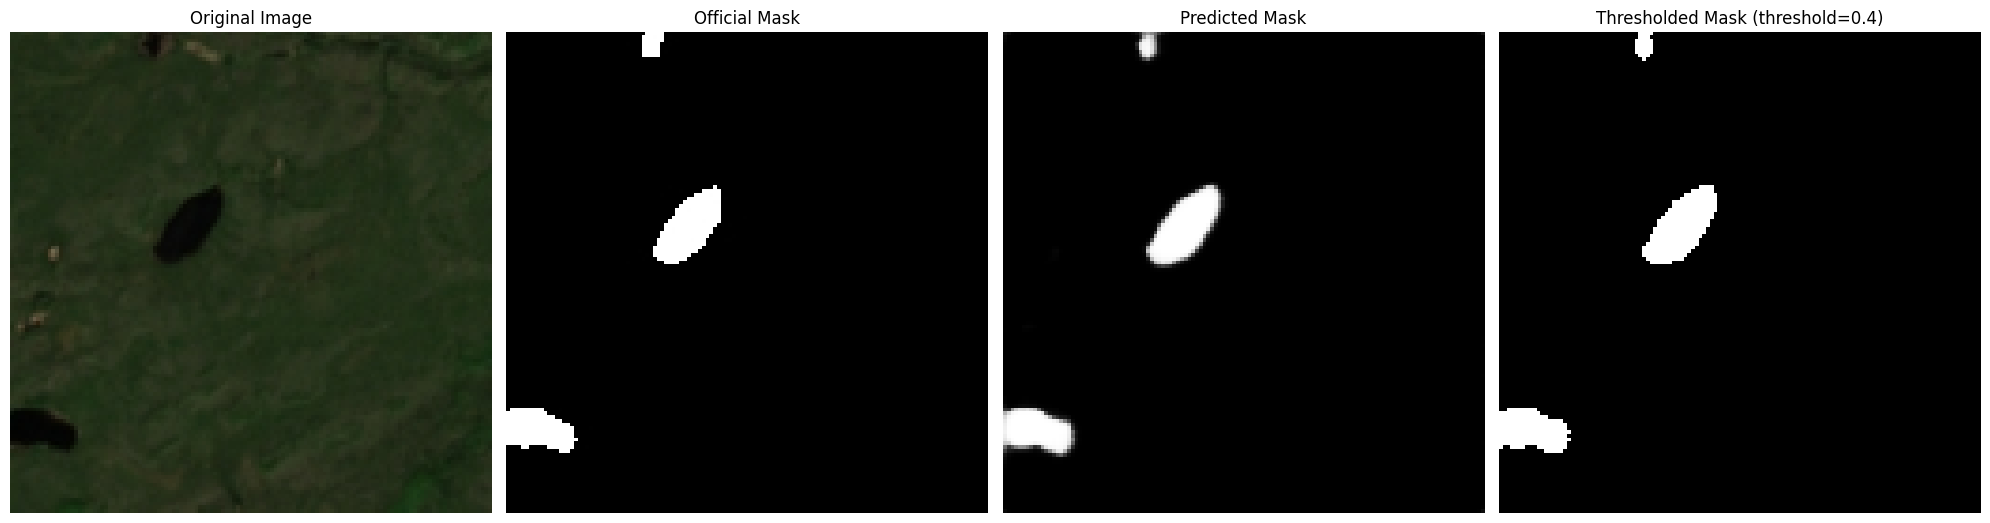

Processing 409_8832_512.jpg


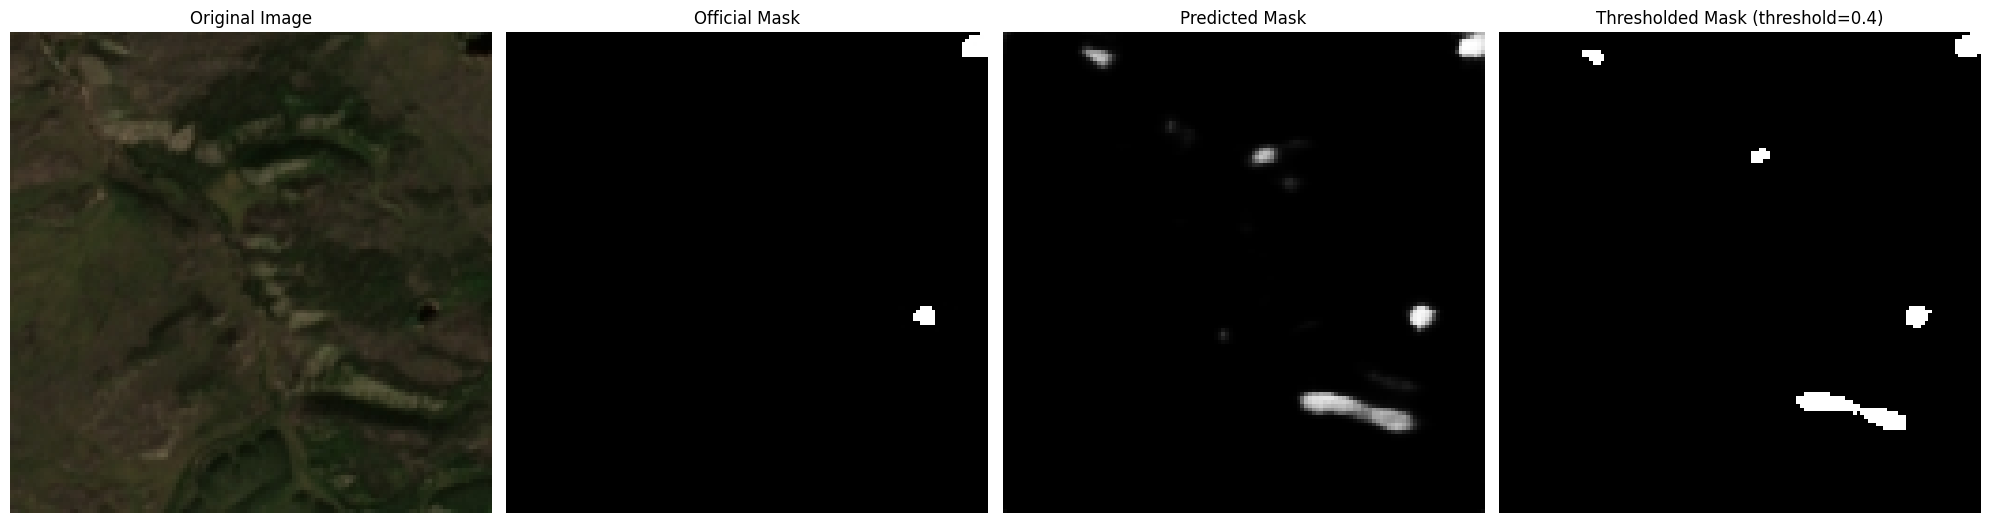

Processing 415_9600_512.jpg


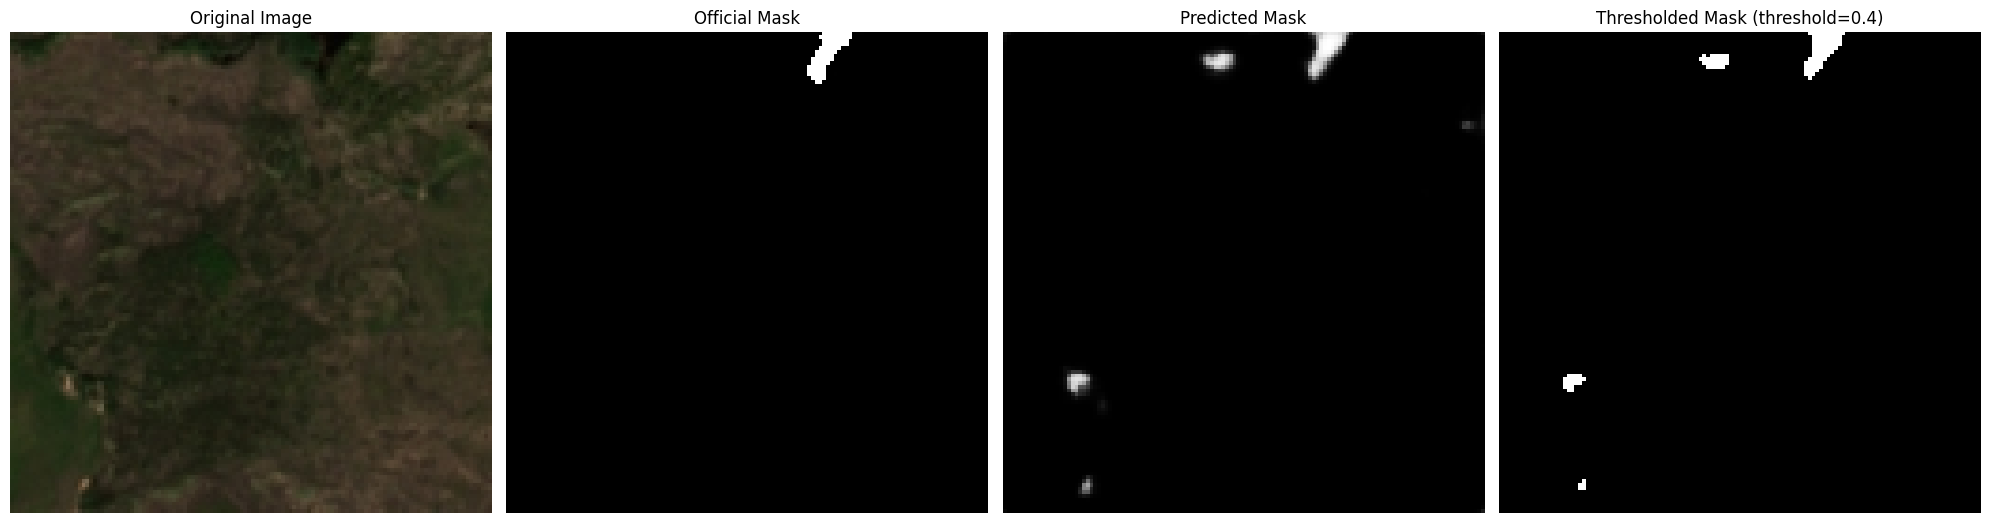

Processing 430_640_640.jpg


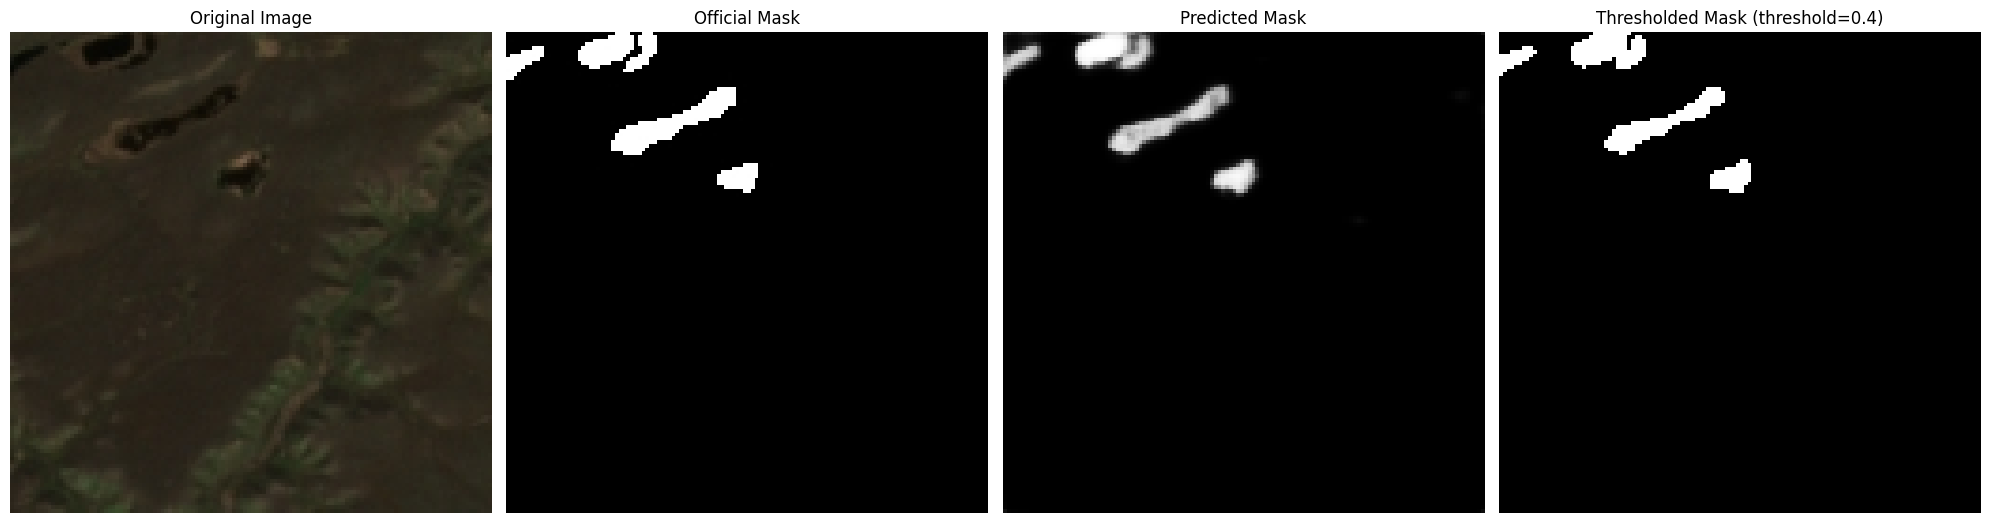

Processing 46_5888_0.jpg


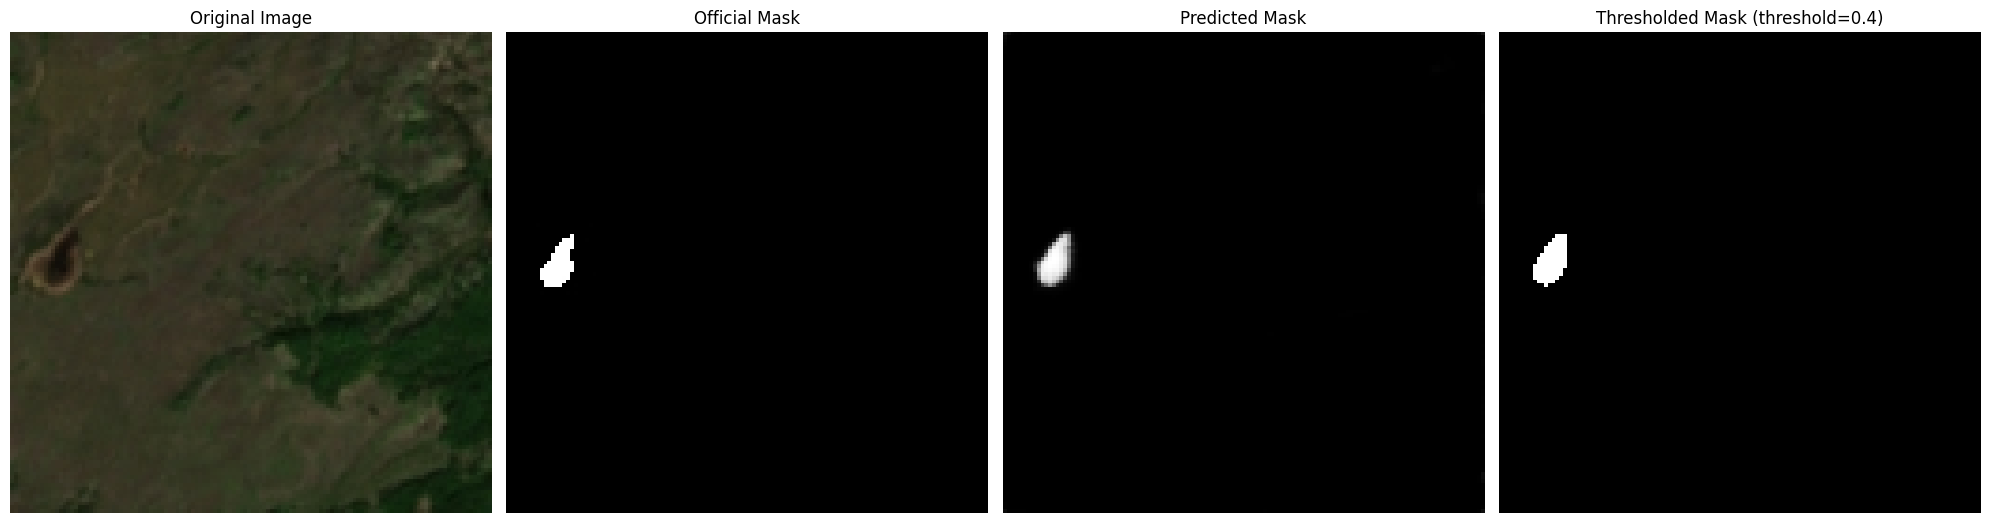

Processing 47_6016_0.jpg


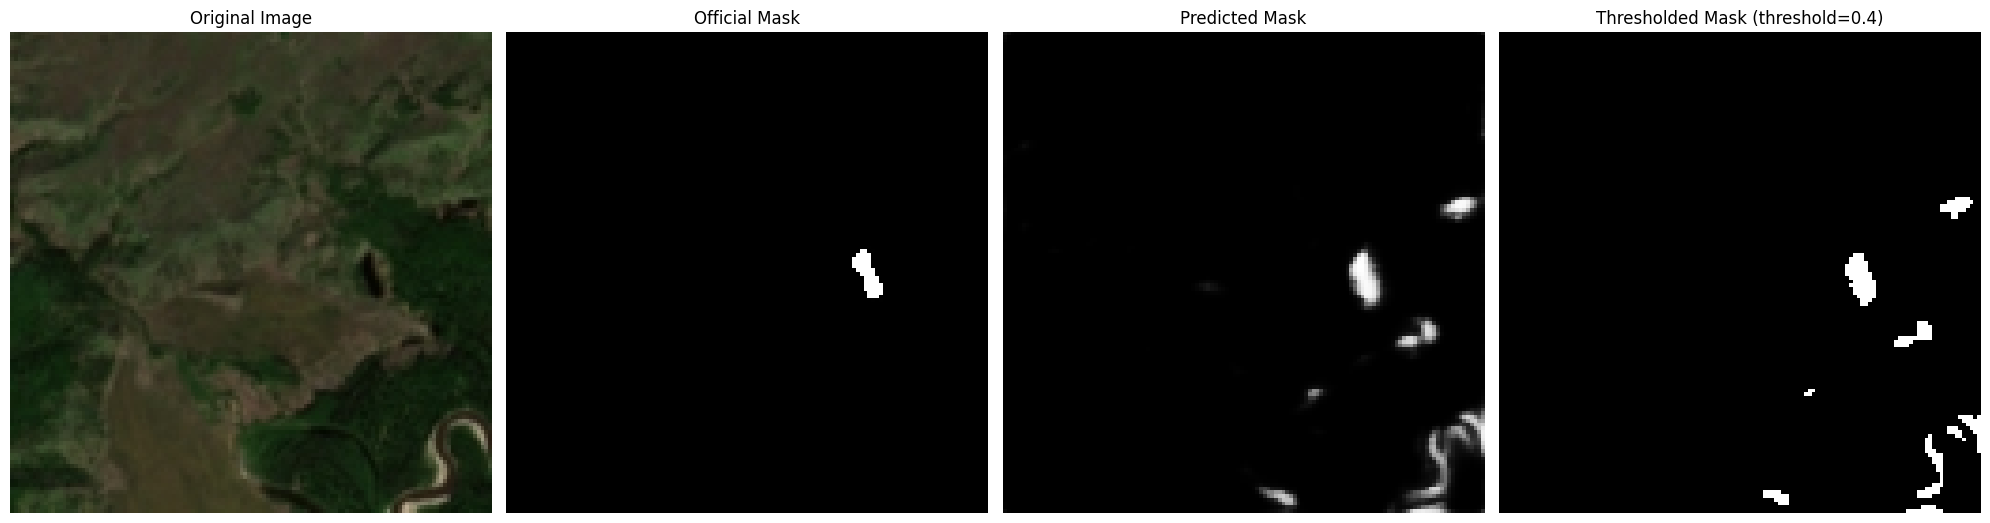

Processing 492_8576_640.jpg


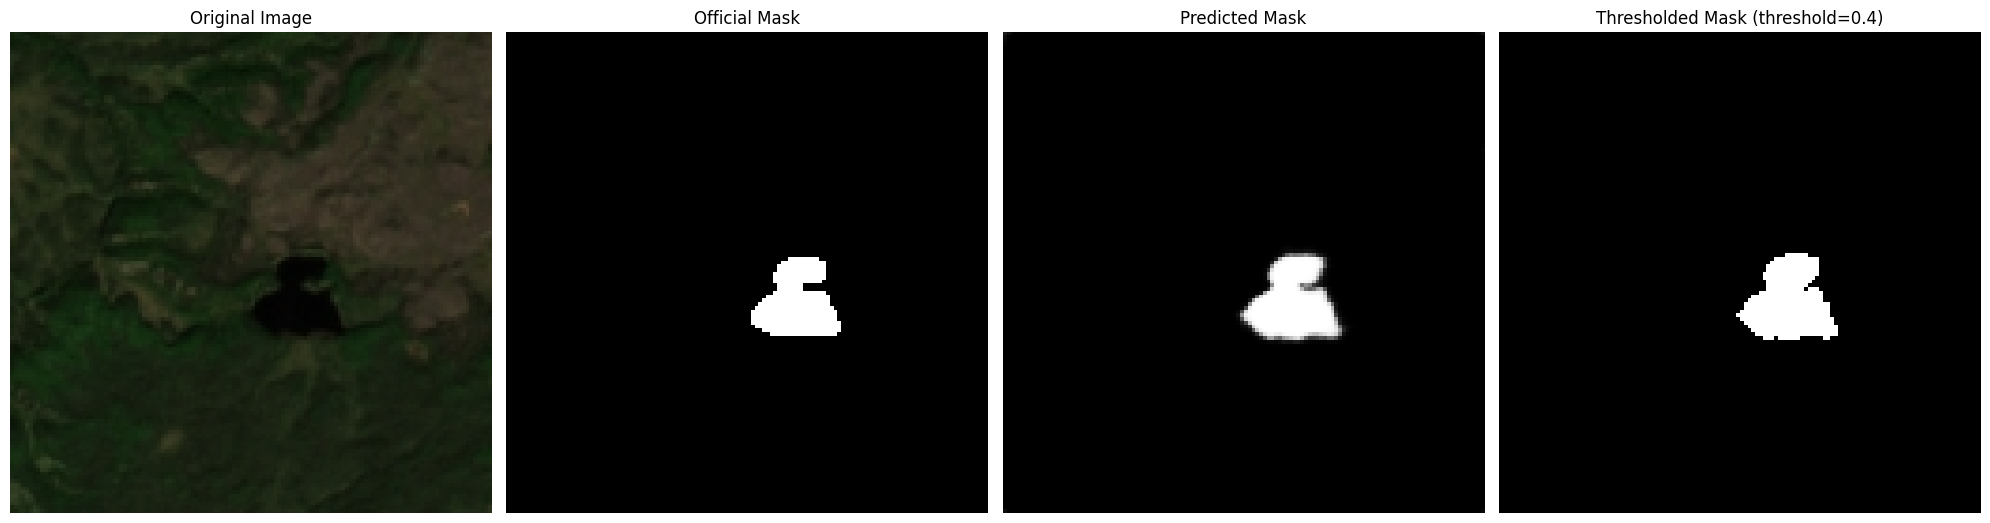

Processing 4_512_0.jpg


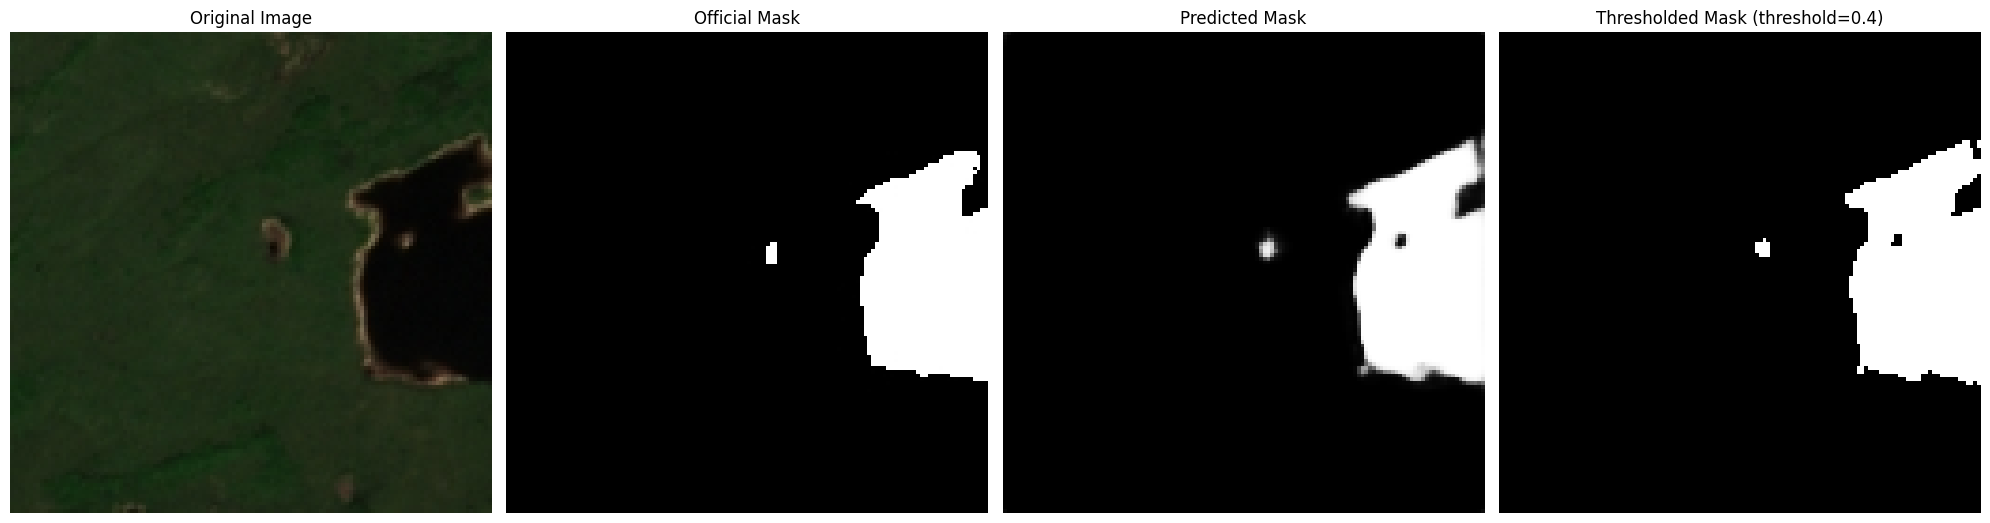

Processing 515_640_768.jpg


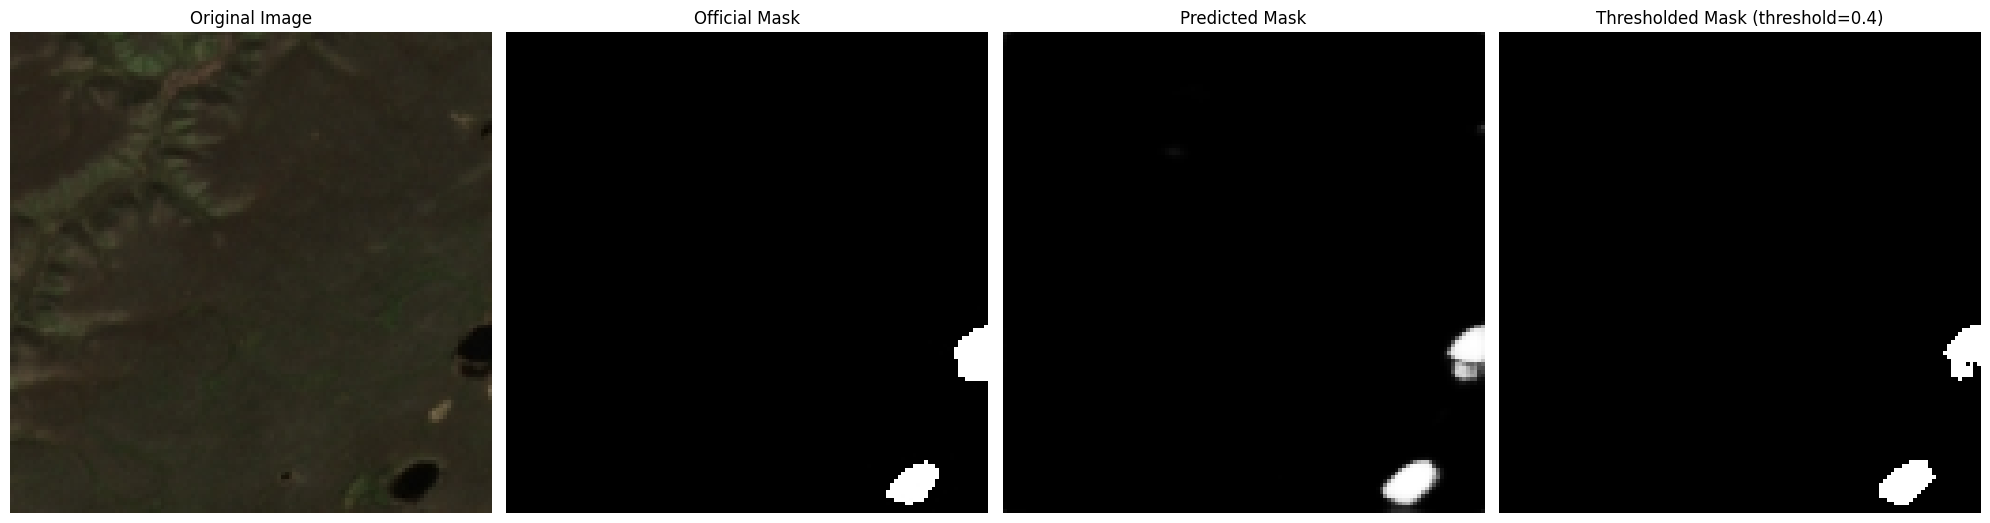

Processing 518_1024_768.jpg


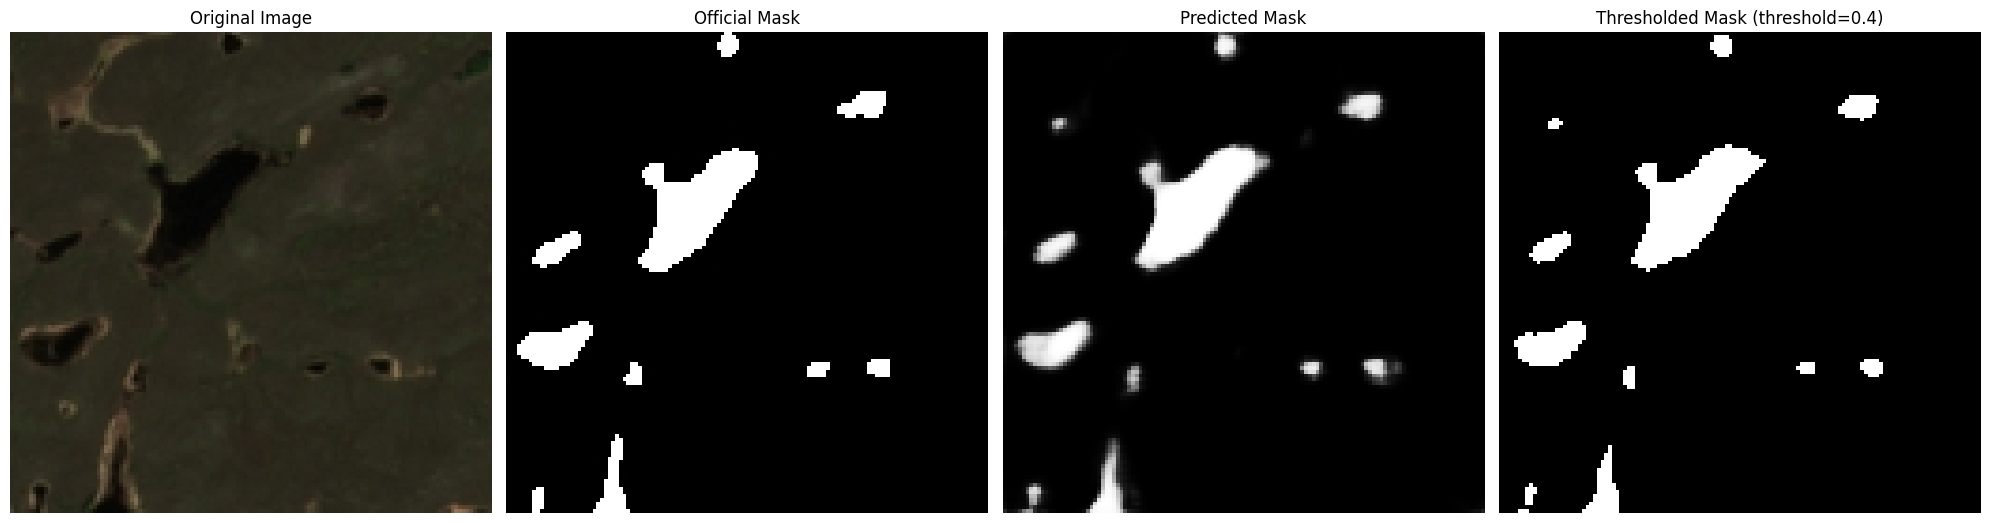

Processing 524_1792_768.jpg


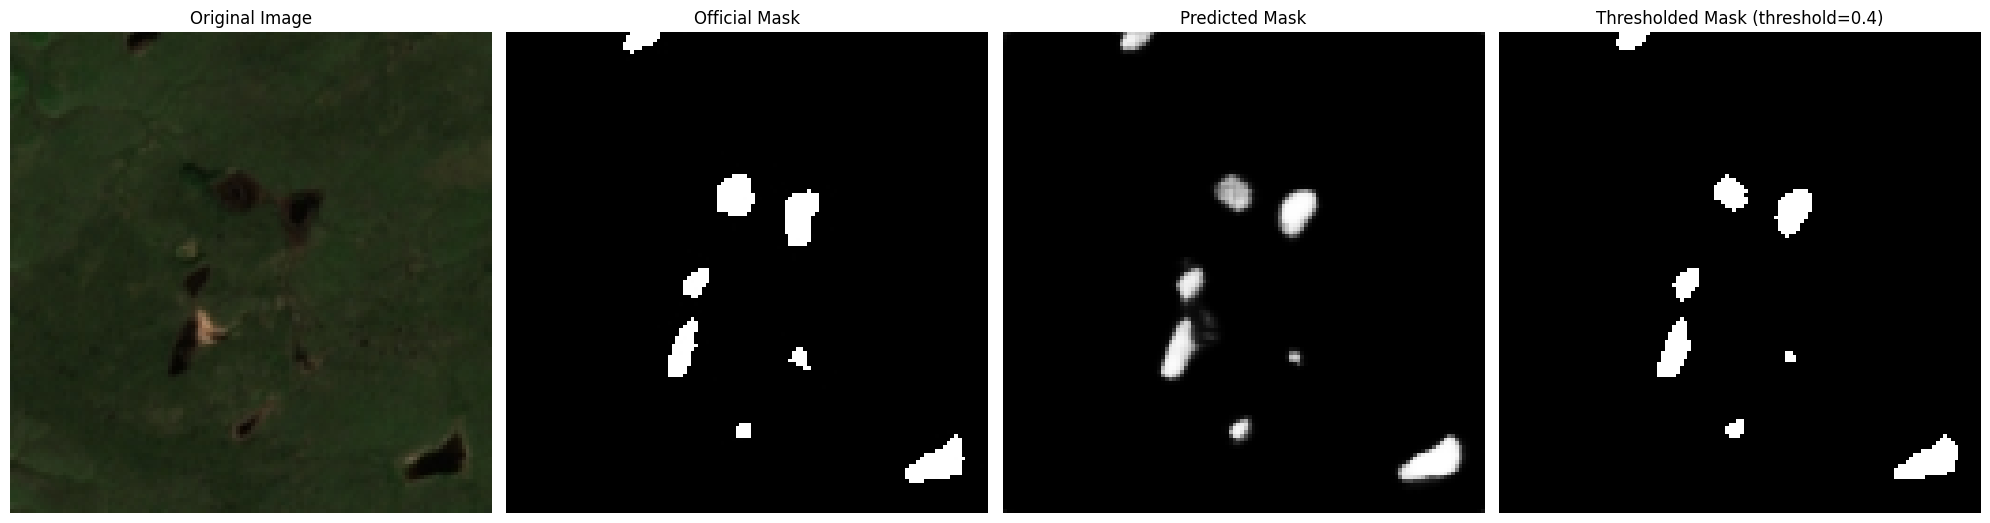

Processing 525_1920_768.jpg


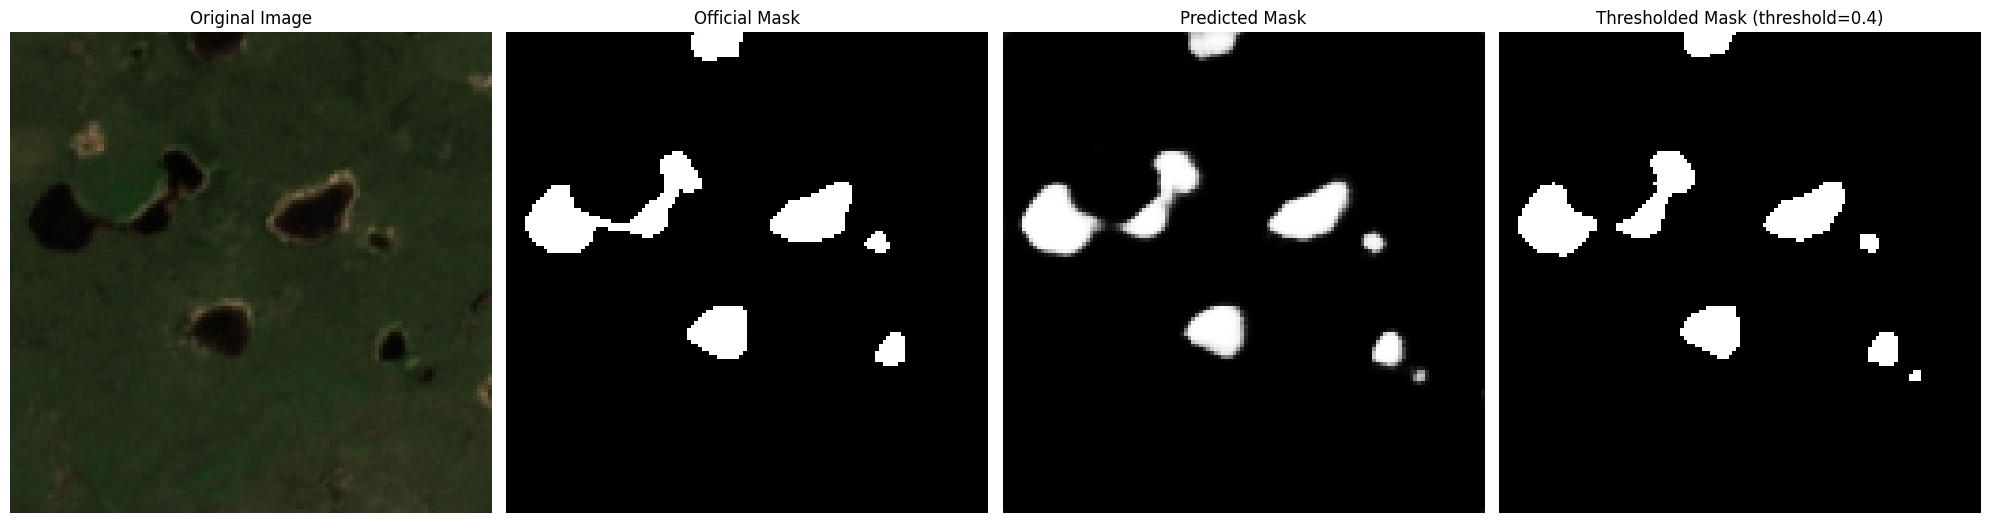

Processing 528_2304_768.jpg


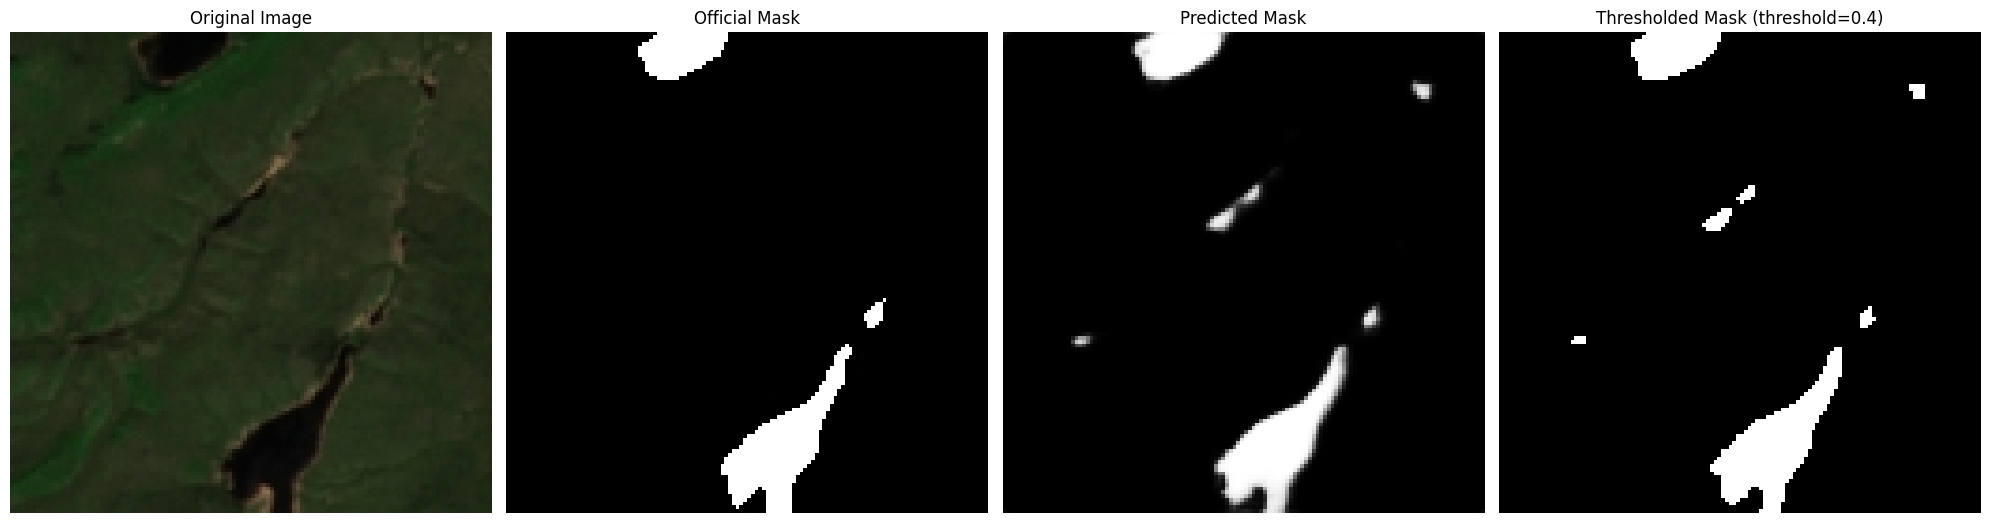

Processing 529_2432_768.jpg


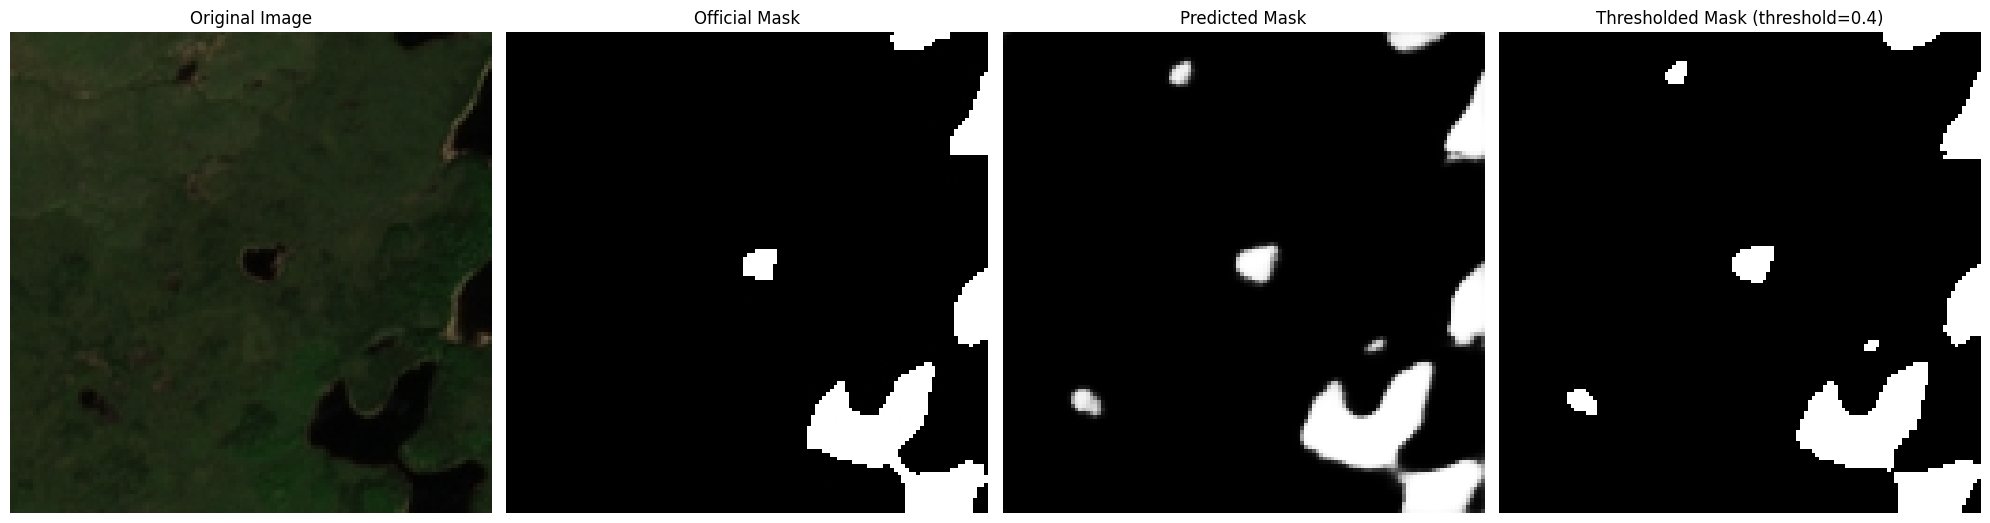

Processing 531_2688_768.jpg


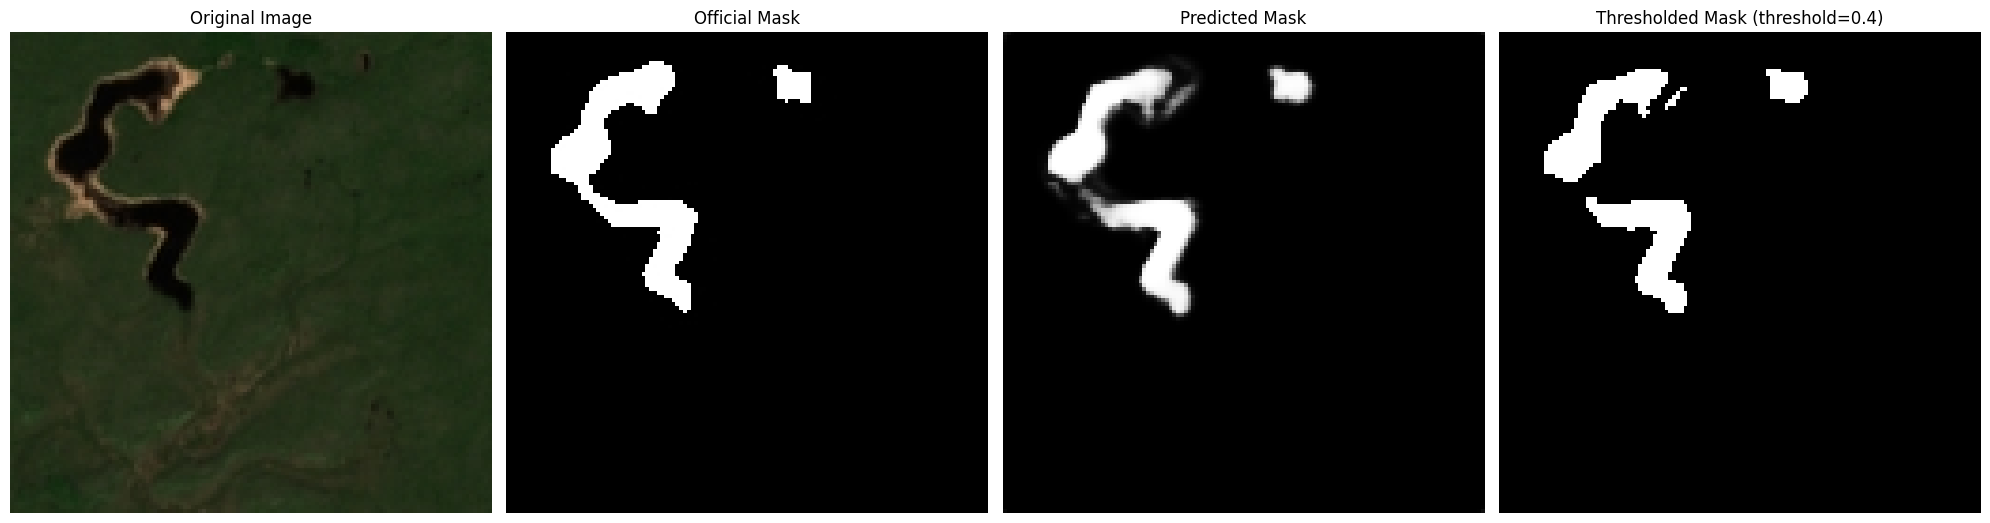

Processing 536_3328_768.jpg


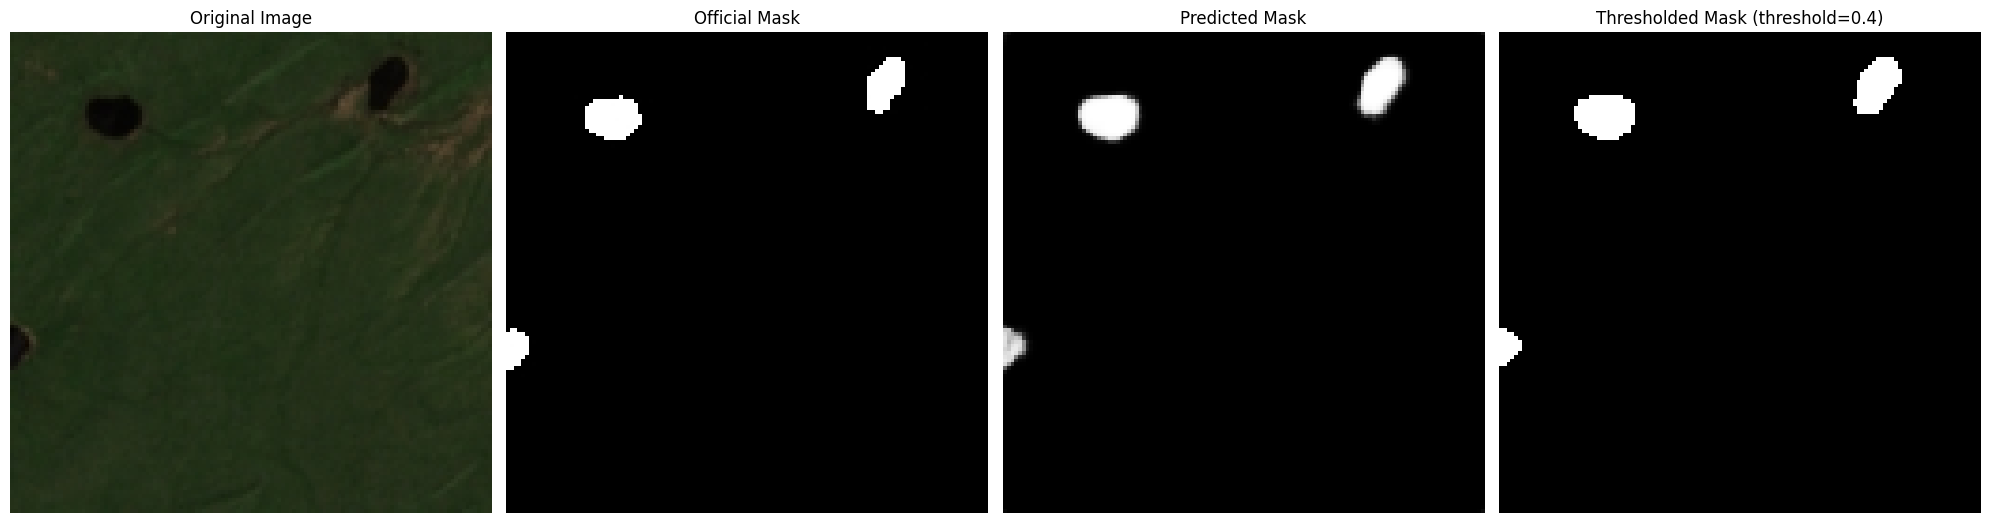

Processing 544_4352_768.jpg


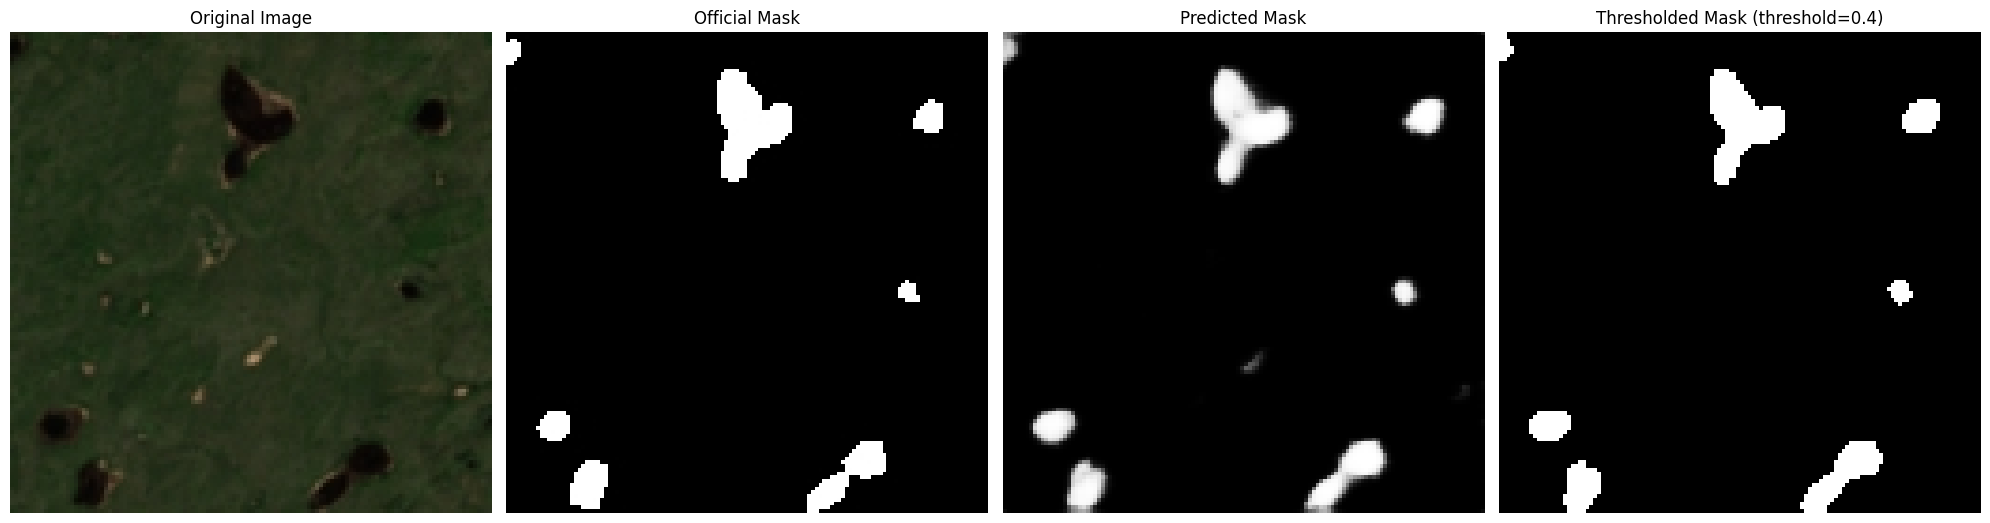

Processing 557_6016_768.jpg


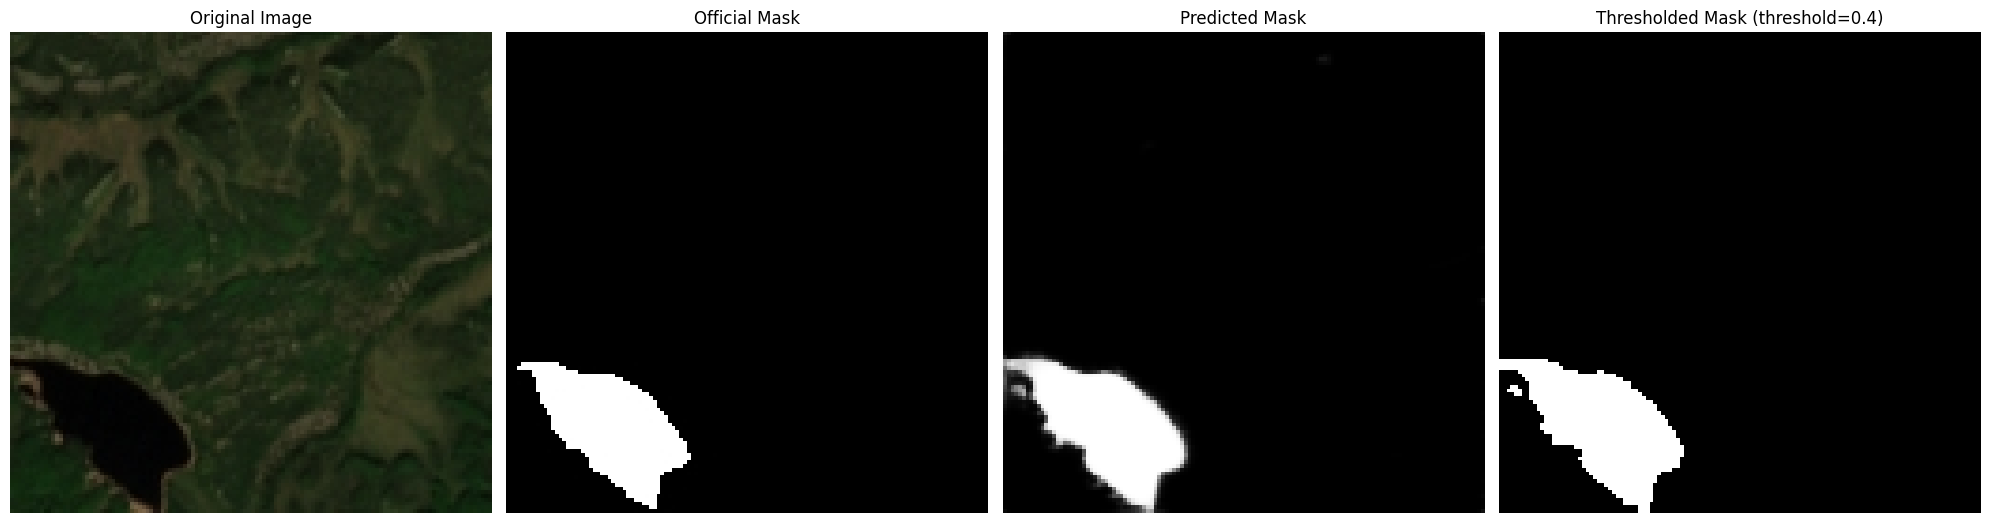

Processing 57_7296_0.jpg


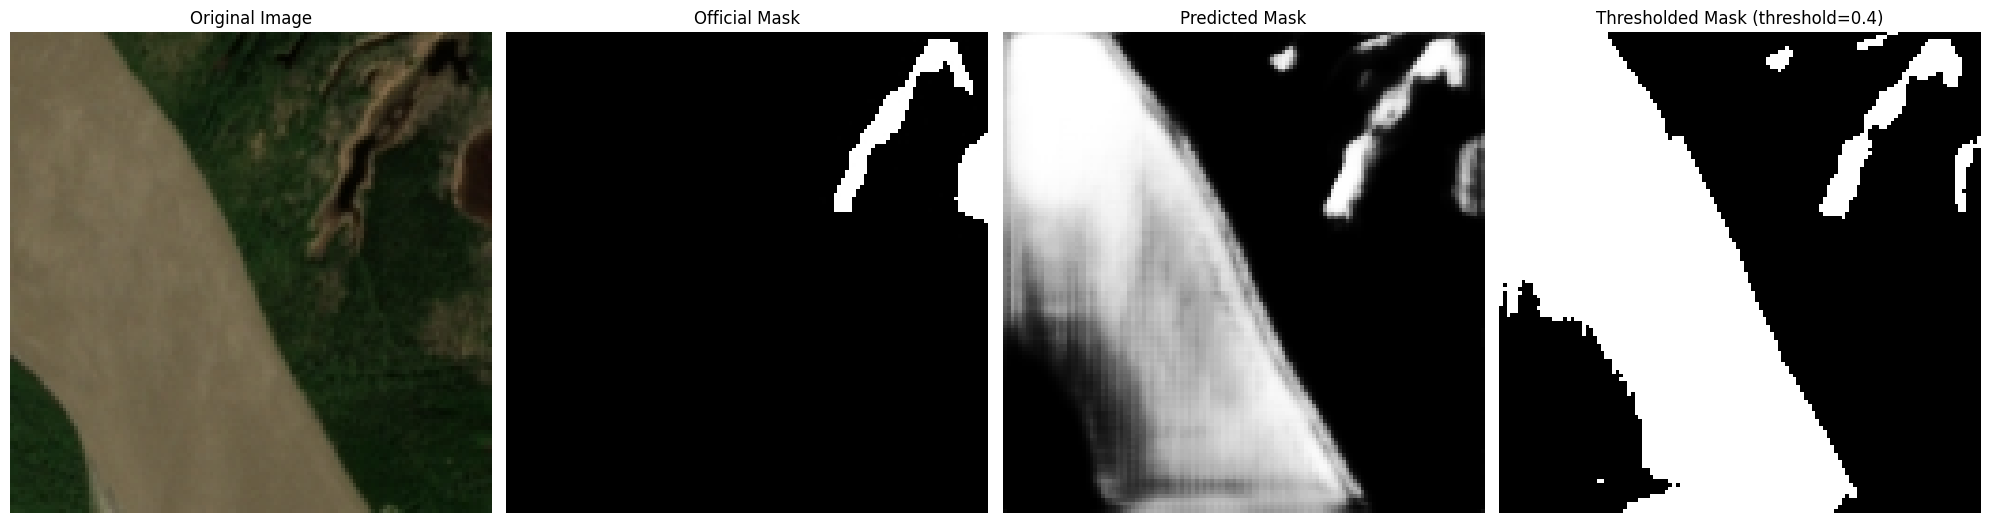

Processing 597_256_896.jpg


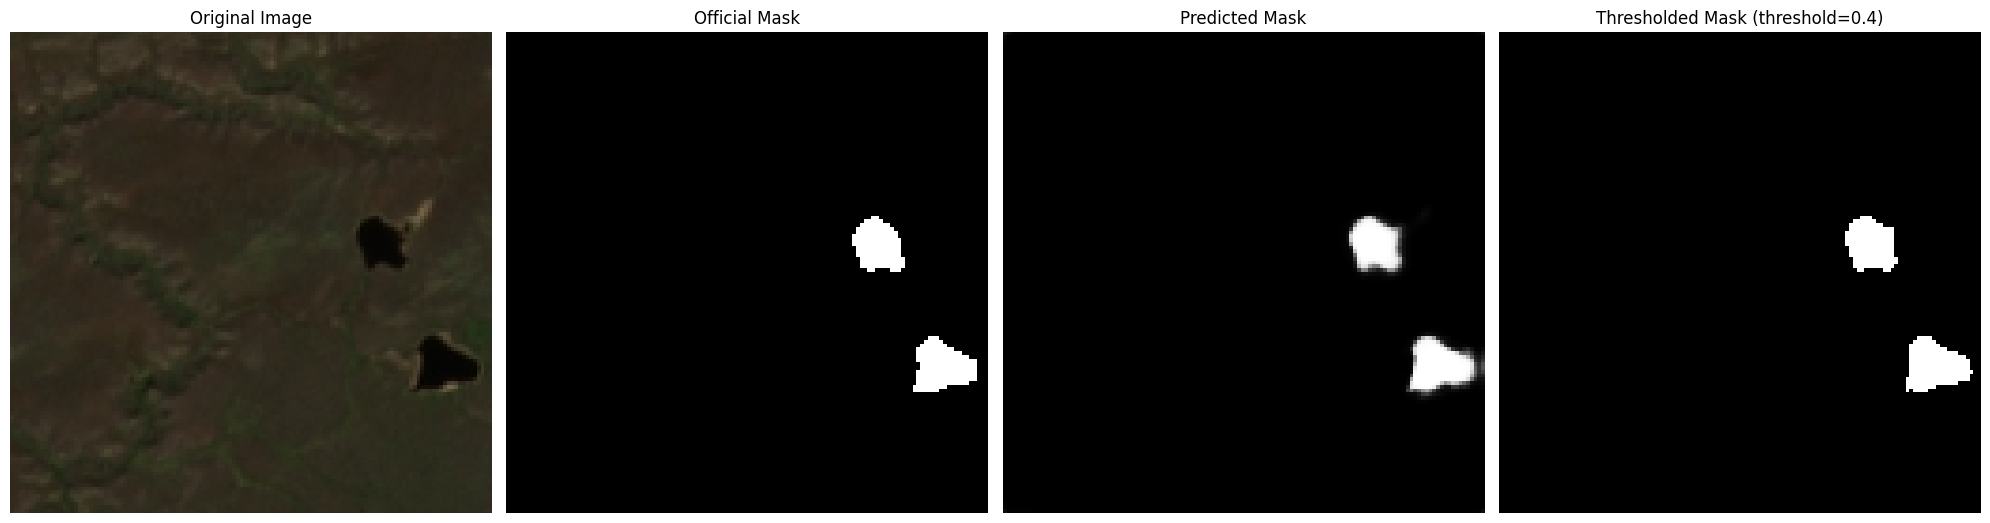

Processing 602_896_896.jpg


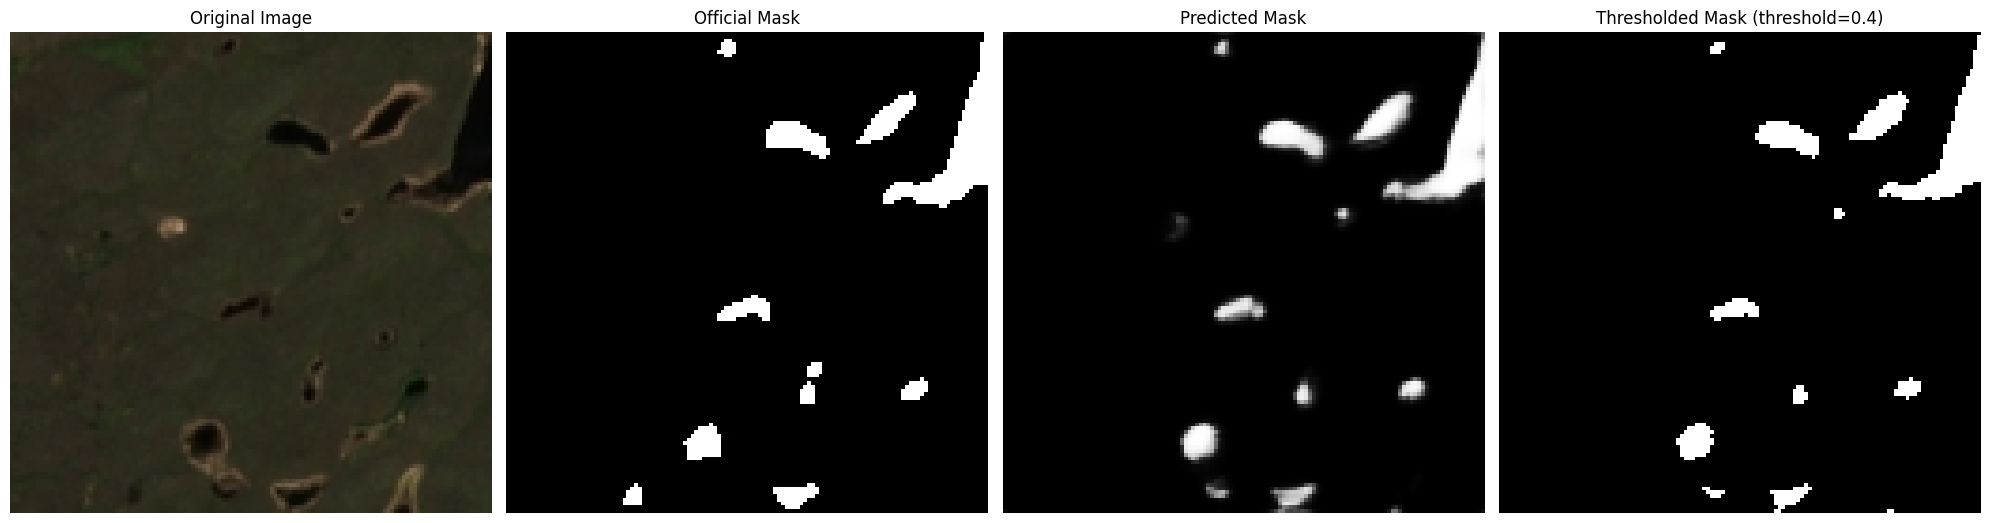

Processing 603_1024_896.jpg


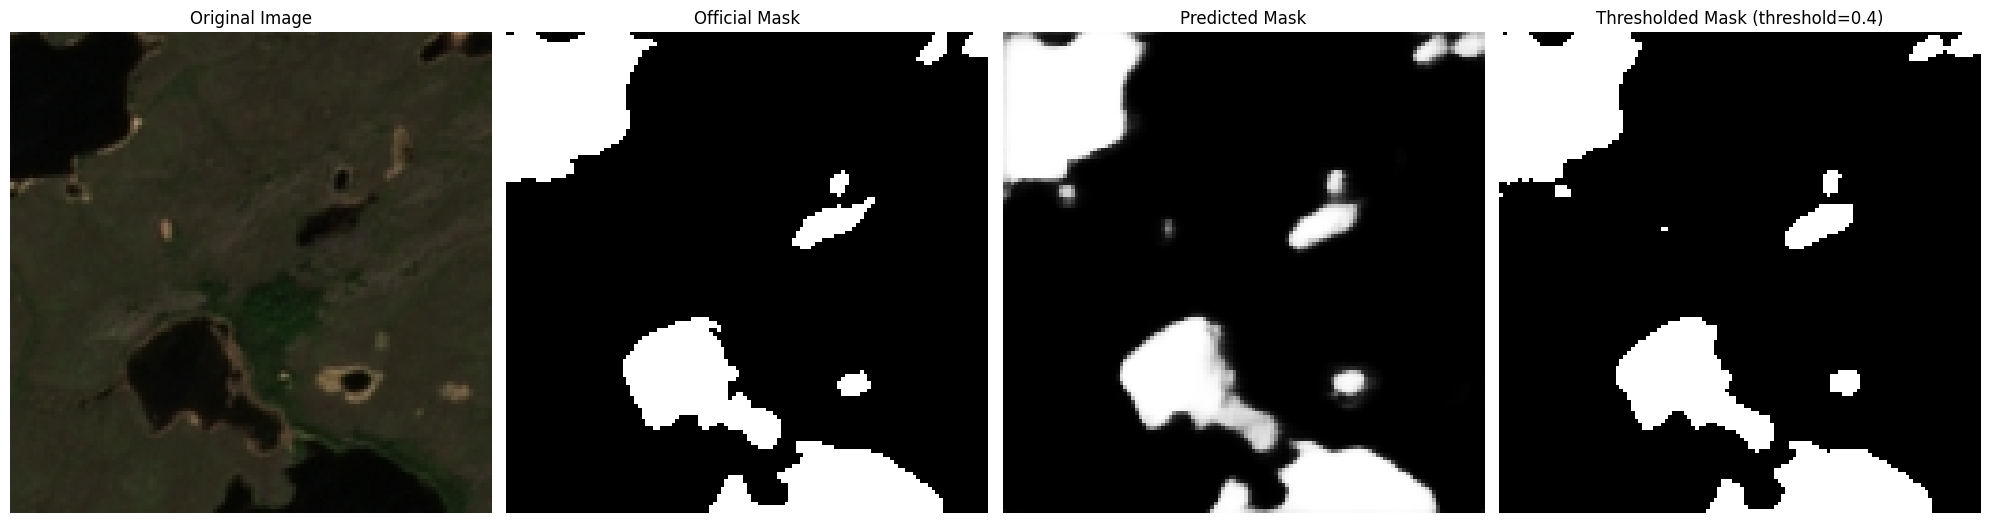

Processing 605_1280_896.jpg


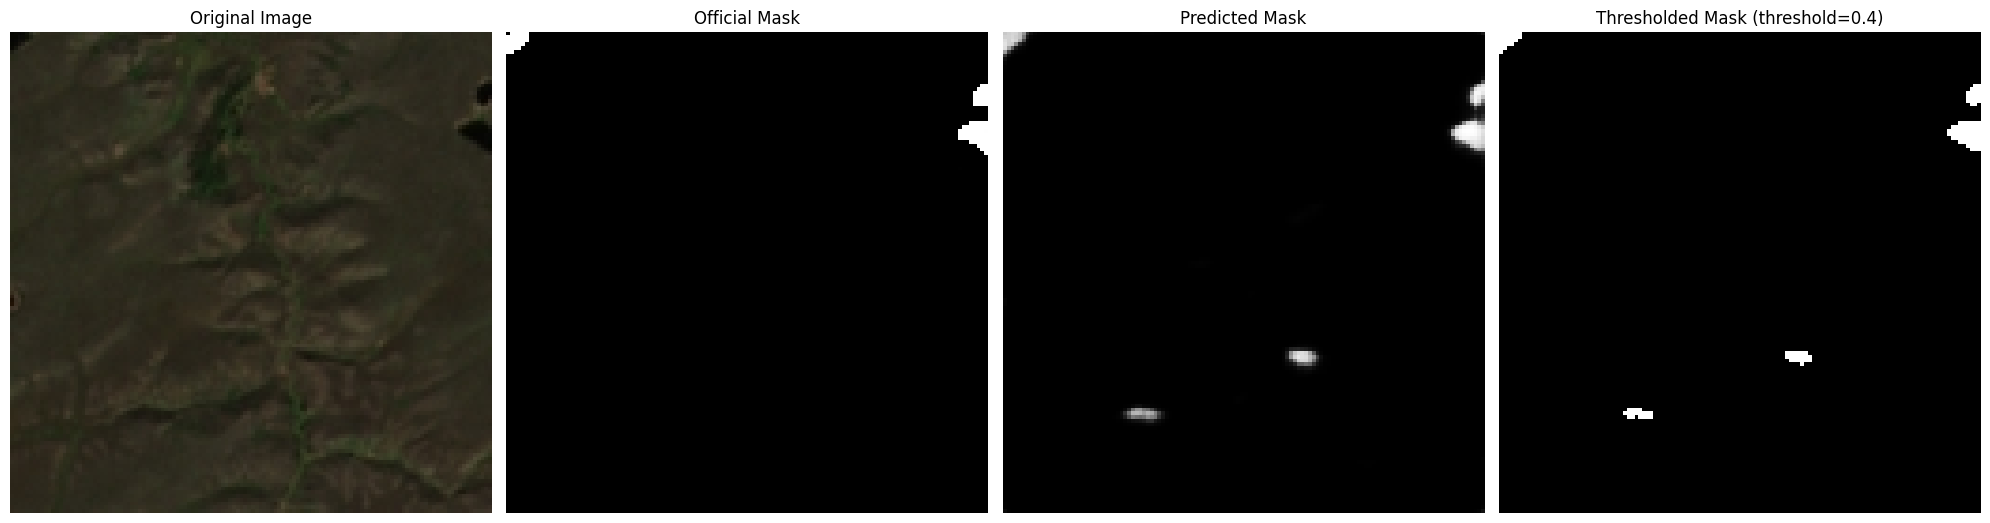

Processing 606_1408_896.jpg


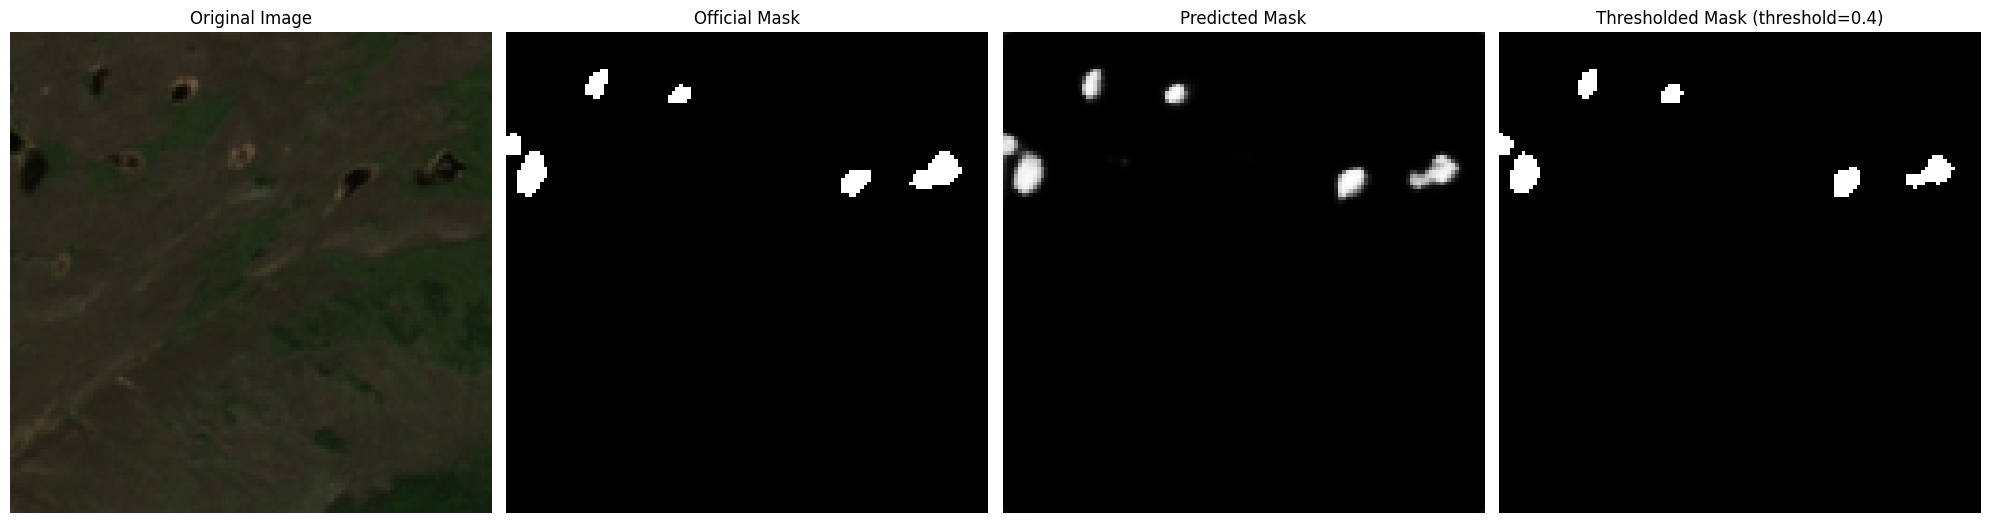

Processing 611_2048_896.jpg


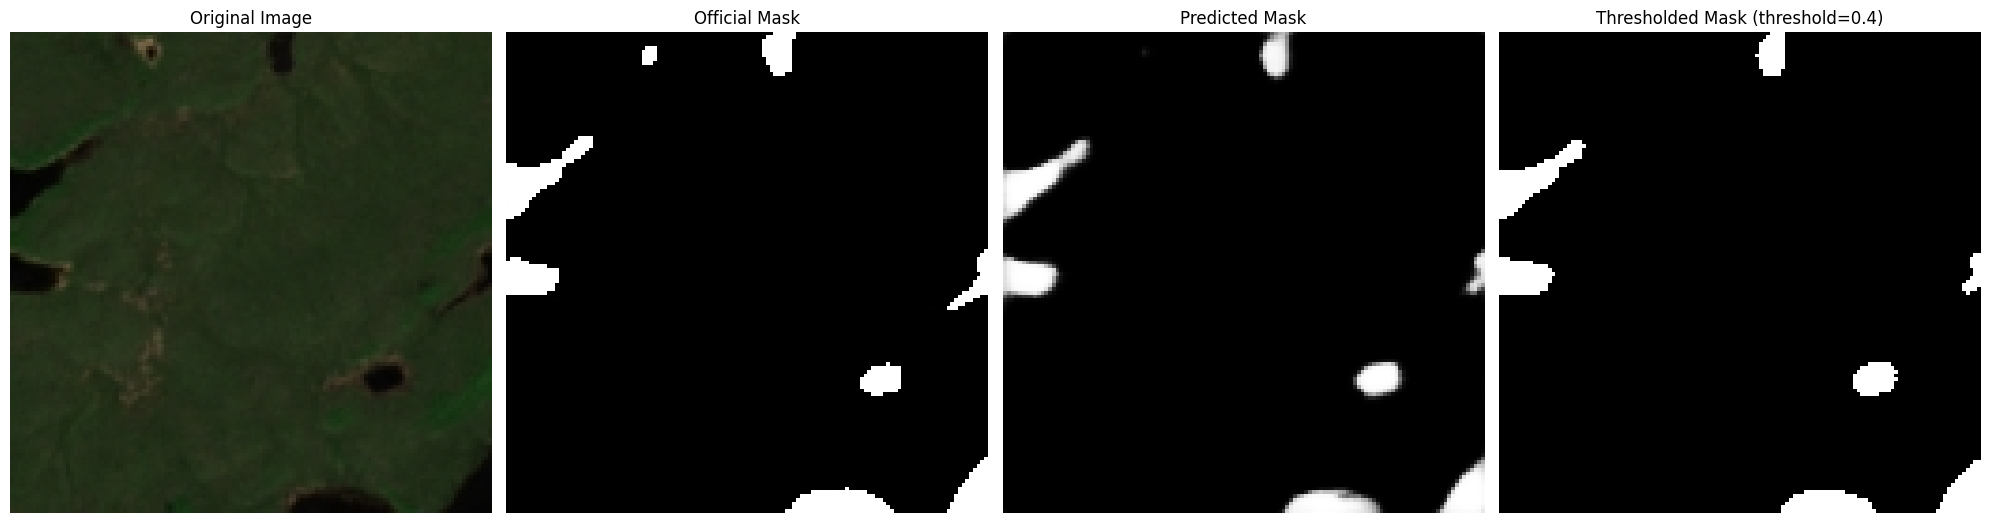

In [ ]:

# Load the model
model = load_model(model_path)

# Get list of images
image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]

# Initialize lists to store accuracy scores
accuracies = []

# Loop through images and masks
for image_file in image_files:
    print(image_file)
    # Load image and mask
    image_path = os.path.join(image_dir, image_file)
    mask_path = os.path.join(mask_dir, image_file)
    
    image = np.asarray(Image.open(image_path).convert('RGB')).astype('float') / 255.
    mask = np.asarray(Image.open(mask_path).convert('L')).astype('float') / 255.
    
    # Predict mask
    tile_batch = np.expand_dims(image, axis=0)
    pred = model.predict(tile_batch, verbose=0)[0]
    
    # Threshold the predicted mask
    threshold_mask = pred > THRESHOLD
    
    # Threshold the official mask
    threshold_official_mask = mask > THRESHOLD
    
    # Calculate accuracy
    accuracy = accuracy_score(threshold_official_mask.flatten(), threshold_mask.flatten())
    accuracies.append(accuracy)
    
    # Plot the results
    plt.figure(figsize=(20, 6))
    
    plt.subplot(1, 4, 1)
    plt.imshow(image)
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1, 4, 2)
    plt.imshow(mask, cmap='gray')
    plt.title('Official Mask')
    plt.axis('off')
    
    plt.subplot(1, 4, 3)
    plt.imshow(pred, cmap='gray')
    plt.title('Predicted Mask')
    plt.axis('off')
    
    plt.subplot(1, 4, 4)
    plt.imshow(threshold_mask, cmap='gray')
    plt.title(f'Thresholded Mask (threshold={THRESHOLD})')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Print average accuracy
print(f'Average accuracy: {np.mean(accuracies):.4f}')